### Final Project Code

**Load Libraries**

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import json
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

**Upload Flight Data**

In [2]:
df1 = pd.read_csv("/Users/002736125/Desktop/All Folders/Personal/School/Analytics/ALY 6040 Data Mining/flight_data_2018_to_2022.csv")

C:\Users\002736125\AppData\Local\Temp\ipykernel_25268\1396579289.py:1: DtypeWarning: Columns (11,13,78,85,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("/Users/002736125/Desktop/All Folders/Personal/School/Analytics/ALY 6040 Data Mining/flight_data_2018_to_2022.csv")


**Upload Weather Data**

In [3]:
df2 = pd.read_csv("/Users/002736125/Desktop/All Folders/Personal/School/Analytics/ALY 6040 Data Mining/open-meteo-40.74N74.04W51m.csv")

In [4]:
df1.describe()


,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
count,563737.0,563737.0,563737.0,563737.000000,563737.000000,563737.000000,563737.000000,17.0,17.000000,563737.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2022.0,1.0,1.0,15.963577,4.044444,19831.807753,2680.255515,20304.0,4131.294118,20001.203114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,8.982503,2.086369,271.869441,1803.194659,0.0,450.516060,376.353237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2022.0,1.0,1.0,1.000000,1.000000,19393.000000,1.000000,20304.0,3714.000000,19393.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022.0,1.0,1.0,8.000000,2.000000,19790.000000,1153.000000,20304.0,3855.000000,19790.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022.0,1.0,1.0,16.000000,4.000000,19805.000000,2314.000000,20304.0,3975.000000,19977.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022.0,1.0,1.0,24.000000,6.000000,19977.000000,4187.000000,20304.0,4138.000000,20378.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022.0,1.0,1.0,31.000000,7.000000,20436.000000,8816.000000,20304.0,5622.000000,20500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2.describe()

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h)
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,-2.152823,64.584677,-8.383065,0.162097,0.111156,0.035753,0.034946,11.524194,1018.542742,1012.015860,48.477151,19.423387,40.100806,52.446237,15.262366,24.743414,224.002688,222.606183,27.159274
std,5.671998,18.765489,7.873473,0.764938,0.736455,0.160126,0.037917,23.671415,10.245009,10.100285,40.261120,35.260798,44.254699,46.496615,7.691705,11.478656,111.384907,111.077905,13.079016
min,-17.500000,23.000000,-23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,984.400000,978.300000,0.000000,0.000000,0.000000,0.000000,0.700000,1.100000,1.000000,1.000000,2.200000
25%,-6.125000,49.000000,-14.225000,0.000000,0.000000,0.000000,0.020000,0.000000,1011.600000,1005.200000,3.000000,0.000000,0.000000,0.000000,9.100000,16.800000,189.500000,186.500000,16.500000
50%,-2.000000,63.000000,-8.850000,0.000000,0.000000,0.000000,0.020000,1.000000,1018.800000,1012.300000,40.000000,0.000000,11.000000,66.500000,14.800000,24.600000,246.500000,248.000000,27.000000
75%,1.325000,80.000000,-3.400000,0.000000,0.000000,0.000000,0.030000,3.000000,1026.500000,1019.925000,90.000000,18.000000,98.000000,100.000000,20.400000,31.900000,315.000000,314.000000,35.600000
max,13.600000,100.000000,11.600000,9.400000,9.400000,1.330000,0.150000,75.000000,1037.000000,1030.300000,100.000000,100.000000,100.000000,100.000000,54.000000,83.000000,360.000000,360.000000,94.700000


In [6]:
df2.shape

(744, 20)

**Create Feature of Number of Arriving Flights at NY,NY**

In [7]:
# Group by DestCityName, FlightDate, and ArrTimeBlk and count occurrences
df1['ArrCount'] = df1.groupby(['DestCityName', 'FlightDate', 'ArrTimeBlk'])['FlightDate'].transform('count')

# Filter rows where FlightDate, DepTimeBlk, and OriginCityName all match
filtered_rows = df1.duplicated(subset=['FlightDate', 'DepTimeBlk', 'OriginCityName'], keep=False)

# Add the counts to matching rows
df1.loc[filtered_rows, 'ArrCount'] = df1.loc[filtered_rows, 'ArrCount']

# Fill NaN values with 0 (for rows where FlightDate, DepTimeBlk, and OriginCityName do not match)
df1['ArrCount'] = df1['ArrCount'].fillna(0)


In [8]:
arrcount_summary = df1['ArrCount'].describe()
print(arrcount_summary)

count    563737.000000
mean         25.162285
std          23.283142
min           1.000000
25%           6.000000
50%          18.000000
75%          37.000000
max         105.000000
Name: ArrCount, dtype: float64


**Remove all but New York City Airports**

In [9]:
# Drop rows where OriginState is not 'NY'
df1 = df1[df1['OriginCityName'] == 'New York, NY']

In [10]:
df1.shape

(25346, 120)

**Remove Cancelled and Diverted Flights**

In [11]:
# Remove rows where 'Cancelled' column is 1
df1 = df1[df1['Cancelled'] != 1]

# Remove rows where 'Diverted' column is 1
df1 = df1[df1['Diverted'] != 1]

In [12]:
df1.shape

(22701, 120)

**Remove Columns Not Needed**

In [13]:
# Calculate the number of unique values for each column
unique_values_count = df1.nunique()

# Create a list of columns along with the number of unique values
columns_with_unique_values = [(column, count) for column, count in unique_values_count.items()]

# Print the list
for column, count in columns_with_unique_values:
    print(f"Column: {column}, Number of Unique Values: {count}")

Column: Year, Number of Unique Values: 1
Column: Quarter, Number of Unique Values: 1
Column: Month, Number of Unique Values: 1
Column: DayofMonth, Number of Unique Values: 31
Column: DayOfWeek, Number of Unique Values: 7
Column: FlightDate, Number of Unique Values: 31
Column: Marketing_Airline_Network, Number of Unique Values: 9
Column: Operated_or_Branded_Code_Share_Partners, Number of Unique Values: 12
Column: DOT_ID_Marketing_Airline, Number of Unique Values: 9
Column: IATA_Code_Marketing_Airline, Number of Unique Values: 9
Column: Flight_Number_Marketing_Airline, Number of Unique Values: 1256
Column: Originally_Scheduled_Code_Share_Airline, Number of Unique Values: 0
Column: DOT_ID_Originally_Scheduled_Code_Share_Airline, Number of Unique Values: 0
Column: IATA_Code_Originally_Scheduled_Code_Share_Airline, Number of Unique Values: 0
Column: Flight_Num_Originally_Scheduled_Code_Share_Airline, Number of Unique Values: 0
Column: Operating_Airline , Number of Unique Values: 14
Column: 

In [14]:
# List of columns to remove
columns_to_remove = [
    'Year', 'Quarter', 'Month', 'IATA_Code_Marketing_Airline', 
    'Flight_Number_Marketing_Airline', 'Originally_Scheduled_Code_Share_Airline',
    'DOT_ID_Originally_Scheduled_Code_Share_Airline', 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
    'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number',
    'Flight_Number_Operating_Airline', 'OriginAirportSeqID', 'OriginStateFips',
    'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID',
    'DestStateFips', 'DestStateName', 'DestWac', 'DepTime', 'DepDelay',
    'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime',
    'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
    'Cancelled', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'Flights',
    'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
    'FirstDepTime', 'TotalAddGTime', 'LongestAddGTime', 'DivAirportLandings',
    'DivReachedDest', 'DivActualElapsedTime', 'DivArrDelay', 'DivDistance',
    'Div1Airport', 'Div1AirportID', 'Div1AirportSeqID', 'Div1WheelsOn',
    'Div1TotalGTime', 'Div1LongestGTime', 'Div1WheelsOff', 'Div1TailNum',
    'Div2Airport', 'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn',
    'Div2TotalGTime', 'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum',
    'Div3Airport', 'Div3AirportID', 'Div3AirportSeqID', 'Div3WheelsOn',
    'Div3TotalGTime', 'Div3LongestGTime', 'Div3WheelsOff', 'Div3TailNum',
    'Div4Airport', 'Div4AirportID', 'Div4AirportSeqID', 'Div4WheelsOn',
    'Div4TotalGTime', 'Div4LongestGTime', 'Div4WheelsOff', 'Div4TailNum',
    'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID', 'Div5WheelsOn',
    'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum',
    'Duplicate'
]

# Drop the specified columns
df1 = df1.drop(columns=columns_to_remove)

In [15]:
df1.shape

(22701, 27)

In [16]:
print(df1)

        DayofMonth  DayOfWeek FlightDate Marketing_Airline_Network  \
13               6          4   1/6/2022                        DL   
22               6          4   1/6/2022                        DL   
52               6          4   1/6/2022                        DL   
74               6          4   1/6/2022                        DL   
88               6          4   1/6/2022                        DL   
...            ...        ...        ...                       ...   
558232          24          1  1/24/2022                        UA   
559034          19          3  1/19/2022                        UA   
562027          19          3  1/19/2022                        UA   
562139          19          3  1/19/2022                        UA   
562339          19          3  1/19/2022                        UA   

       Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline  \
13                                          DL                     19790   
22     

## Merge Datasets

**Change Date Format**

In [17]:
# Convert 'FlightDate' column to datetime format
df1['FlightDate'] = pd.to_datetime(df1['FlightDate'], format='%m/%d/%Y')

# Create a new column with the desired format
df1['NewFlightDate'] = df1['FlightDate'].dt.strftime('%Y-%m-%d')

In [18]:
# Get unique values in the new column
unique_dates = df1['NewFlightDate'].unique()

print("Unique dates in the NewFlightDate column:")
print(unique_dates)

Unique dates in the NewFlightDate column:
['2022-01-06' '2022-01-07' '2022-01-08' '2022-01-15' '2022-01-16'
 '2022-01-17' '2022-01-18' '2022-01-30' '2022-01-31' '2022-01-01'
 '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-19' '2022-01-20'
 '2022-01-21' '2022-01-22' '2022-01-09' '2022-01-10' '2022-01-11'
 '2022-01-23' '2022-01-24' '2022-01-25' '2022-01-12' '2022-01-13'
 '2022-01-14' '2022-01-26' '2022-01-27' '2022-01-28' '2022-01-05'
 '2022-01-29']


**Change Time**

In [19]:
# Function to convert numbers to "00:00" format
def convert_to_time_format(num):
    if num < 100:
        # Pad single digit with zero and append "00"
        return f'00:{num:02d}'
    else:
        # Convert to hours and minutes
        hours = num // 100
        minutes = num % 100
        # Return formatted time
        return f'{hours:02d}:{minutes:02d}'

# Apply the function to the 'CRSDepTime' column and create a new column 'CRSDepTimeFormatted'
df1['CRSDepTimeFormatted'] = df1['CRSDepTime'].apply(convert_to_time_format)

In [20]:
# Get unique values in the new column
unique_dates = df1['CRSDepTimeFormatted'].unique()

print(unique_dates)

['18:26' '13:59' '18:29' '15:29' '15:14' '15:30' '18:28' '07:34' '18:15'
 '11:20' '11:40' '18:50' '11:30' '07:00' '19:45' '09:00' '07:15' '10:58'
 '19:59' '07:30' '13:00' '10:50' '18:59' '19:55' '08:42' '11:00' '09:59'
 '11:14' '06:10' '06:59' '09:40' '17:15' '18:10' '16:59' '11:29' '12:20'
 '19:10' '06:00' '10:59' '16:02' '16:00' '15:23' '19:00' '11:15' '19:29'
 '07:05' '15:41' '18:07' '13:29' '15:55' '12:59' '14:40' '20:59' '12:30'
 '11:59' '08:35' '17:10' '10:25' '15:45' '20:15' '07:59' '08:10' '18:39'
 '16:44' '14:55' '17:59' '08:00' '20:25' '15:08' '16:05' '12:00' '09:30'
 '17:30' '14:59' '19:50' '21:59' '19:54' '13:55' '19:25' '16:35' '20:00'
 '08:12' '14:10' '10:29' '06:30' '15:59' '14:35' '08:45' '08:20' '14:00'
 '12:45' '16:29' '08:30' '18:51' '17:29' '19:40' '13:12' '08:37' '08:40'
 '07:45' '16:45' '07:35' '16:30' '11:10' '07:38' '16:15' '15:39' '11:39'
 '12:15' '09:25' '09:55' '11:25' '15:00' '10:30' '19:30' '09:15' '08:15'
 '15:24' '12:29' '08:55' '14:58' '13:05' '13:08' '1

In [21]:
# Function to convert numbers to "00:00" format with last two digits as zeros
def convert_to_time_format(num):
    if num < 100:
        # Pad single digit with zero and append "00"
        return f'00:00'
    else:
        # Convert to hours and truncate last two digits
        hours = num // 100
        # Return formatted time
        return f'{hours:02d}:00'

# Apply the function to the 'CRSDepTime' column and create a new column 'CRSDepTimeFormatted'
df1['CRSDepTimeFormatted'] = df1['CRSDepTime'].apply(convert_to_time_format)

In [22]:
# Get unique values in the new column
unique_dates = df1['CRSDepTimeFormatted'].unique()

print(unique_dates)

['18:00' '13:00' '15:00' '07:00' '11:00' '19:00' '09:00' '10:00' '08:00'
 '06:00' '17:00' '16:00' '12:00' '14:00' '20:00' '21:00' '22:00' '05:00'
 '23:00']


In [23]:
# Get unique values in the new column
unique_dates = df2['time'].unique()

print(unique_dates)

['2022-01-01T00:00' '2022-01-01T01:00' '2022-01-01T02:00'
 '2022-01-01T03:00' '2022-01-01T04:00' '2022-01-01T05:00'
 '2022-01-01T06:00' '2022-01-01T07:00' '2022-01-01T08:00'
 '2022-01-01T09:00' '2022-01-01T10:00' '2022-01-01T11:00'
 '2022-01-01T12:00' '2022-01-01T13:00' '2022-01-01T14:00'
 '2022-01-01T15:00' '2022-01-01T16:00' '2022-01-01T17:00'
 '2022-01-01T18:00' '2022-01-01T19:00' '2022-01-01T20:00'
 '2022-01-01T21:00' '2022-01-01T22:00' '2022-01-01T23:00'
 '2022-01-02T00:00' '2022-01-02T01:00' '2022-01-02T02:00'
 '2022-01-02T03:00' '2022-01-02T04:00' '2022-01-02T05:00'
 '2022-01-02T06:00' '2022-01-02T07:00' '2022-01-02T08:00'
 '2022-01-02T09:00' '2022-01-02T10:00' '2022-01-02T11:00'
 '2022-01-02T12:00' '2022-01-02T13:00' '2022-01-02T14:00'
 '2022-01-02T15:00' '2022-01-02T16:00' '2022-01-02T17:00'
 '2022-01-02T18:00' '2022-01-02T19:00' '2022-01-02T20:00'
 '2022-01-02T21:00' '2022-01-02T22:00' '2022-01-02T23:00'
 '2022-01-03T00:00' '2022-01-03T01:00' '2022-01-03T02:00'
 '2022-01-03T0

In [24]:
# Combine the two new columns with 'T' between them
df1['CombinedDateTime'] = df1['NewFlightDate'] + 'T' + df1['CRSDepTimeFormatted']

In [25]:
df1['CombinedDateTime'].unique()

array(['2022-01-06T18:00', '2022-01-06T13:00', '2022-01-06T15:00',
       '2022-01-06T07:00', '2022-01-06T11:00', '2022-01-06T19:00',
       '2022-01-06T09:00', '2022-01-06T10:00', '2022-01-06T08:00',
       '2022-01-06T06:00', '2022-01-07T09:00', '2022-01-07T17:00',
       '2022-01-07T18:00', '2022-01-07T16:00', '2022-01-07T11:00',
       '2022-01-07T12:00', '2022-01-07T19:00', '2022-01-07T06:00',
       '2022-01-07T10:00', '2022-01-07T15:00', '2022-01-07T13:00',
       '2022-01-07T07:00', '2022-01-07T14:00', '2022-01-07T20:00',
       '2022-01-07T08:00', '2022-01-07T21:00', '2022-01-08T07:00',
       '2022-01-08T09:00', '2022-01-08T16:00', '2022-01-08T20:00',
       '2022-01-08T11:00', '2022-01-08T12:00', '2022-01-08T08:00',
       '2022-01-08T19:00', '2022-01-08T14:00', '2022-01-08T10:00',
       '2022-01-08T06:00', '2022-01-08T15:00', '2022-01-08T18:00',
       '2022-01-08T17:00', '2022-01-08T13:00', '2022-01-15T07:00',
       '2022-01-15T13:00', '2022-01-15T06:00', '2022-01-15T18:

**Merge Datasets**

In [26]:
# Merge the two DataFrames based on 'CombinedDateTime' and 'time' columns
merged_df = pd.merge(df1, df2, how='left', left_on='CombinedDateTime', right_on='time')

In [27]:
print(merged_df)

       DayofMonth  DayOfWeek FlightDate Marketing_Airline_Network  \
0               6          4 2022-01-06                        DL   
1               6          4 2022-01-06                        DL   
2               6          4 2022-01-06                        DL   
3               6          4 2022-01-06                        DL   
4               6          4 2022-01-06                        DL   
...           ...        ...        ...                       ...   
22696          24          1 2022-01-24                        UA   
22697          19          3 2022-01-19                        UA   
22698          19          3 2022-01-19                        UA   
22699          19          3 2022-01-19                        UA   
22700          19          3 2022-01-19                        UA   

      Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline  \
0                                          DL                     19790   
1                    

**Add Congestion Variables**

In [28]:
# Group by 'CombinedDateTime' and count the occurrences
count_per_datetime = merged_df.groupby('CombinedDateTime').size().reset_index(name='DepCount')

# Merge the counts back into the original DataFrame
merged_df = pd.merge(merged_df, count_per_datetime, on='CombinedDateTime', how='left')


In [29]:
#Combine ArrCount and DepCount for Congestion
merged_df['Congestion'] = merged_df['ArrCount'] + merged_df['DepCount']

In [31]:
congestion_summary = merged_df['Congestion'].describe()
print(congestion_summary)

count    22701.000000
mean        68.958856
std         22.864047
min          3.000000
25%         55.000000
50%         65.000000
75%         78.000000
max        167.000000
Name: Congestion, dtype: float64


**Observe all New Columns**

In [32]:
for column in merged_df.columns:
    print(column)

DayofMonth
DayOfWeek
FlightDate
Marketing_Airline_Network
Operated_or_Branded_Code_Share_Partners
DOT_ID_Marketing_Airline
Flight_Num_Originally_Scheduled_Code_Share_Airline
Operating_Airline 
OriginAirportID
OriginCityMarketID
Origin
OriginCityName
OriginState
DestCityMarketID
Dest
DestCityName
DestState
CRSDepTime
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
CancellationCode
AirTime
Distance
DistanceGroup
ArrCount
NewFlightDate
CRSDepTimeFormatted
CombinedDateTime
time
temperature_2m (°C)
relative_humidity_2m (%)
dew_point_2m (°C)
precipitation (mm)
rain (mm)
snowfall (cm)
snow_depth (m)
weather_code (wmo code)
pressure_msl (hPa)
surface_pressure (hPa)
cloud_cover (%)
cloud_cover_low (%)
cloud_cover_mid (%)
cloud_cover_high (%)
wind_speed_10m (km/h)
wind_speed_100m (km/h)
wind_direction_10m (°)
wind_direction_100m (°)
wind_gusts_10m (km/h)
DepCount
Congestion


In [34]:
merged_df['Congestion'].unique()

array([ 65,  62,  70,  67,  55,  69,  64,  59,  54,  63,  79,  71,  66,
        81,  58,  60, 103,  53,  57,  90,  44,  85, 104, 106,  72, 107,
        34,  68,  86, 110,  99, 118,  82,  96,  84,  41, 152,  14,  74,
        26,  83,  36, 105,  27, 116,  45, 113,  61,  50,  28,  18,  47,
        19,  24,  93,  77,  48,  78,  73, 109,  56,  42, 108,  49,  91,
        52,  98,  87, 120,  35,  88,  75,  89,  95,  39, 122,  38,  30,
        43,  37,  51,  46, 112,  80,  94,  97, 129, 146, 102, 126,  29,
        76, 100, 134,  92, 119, 117, 115, 150, 139, 131, 142, 137, 125,
       130, 111, 124, 138, 114, 136, 123, 148, 101, 128, 135,  25,  31,
        32,  40, 141, 140, 127, 143, 144, 158, 133, 121, 153, 145,  33,
       132, 157, 147, 154, 151, 160,  21,  23,  17,  20,  15,  16,  11,
        12,   7,   9,  22, 155, 149,   6,   8,   4,   5,  10,   3,  13,
       161, 167, 163, 162, 156], dtype=int64)

## Exploratory Data Analysis (EDA)

**Check Balance for Classficiation Model**

In [35]:
# Calculate the value counts of 'DepDel15' column
dep_del15_counts = merged_df['DepDel15'].value_counts()

# Calculate the percentage of each value
percent_1 = (dep_del15_counts[1] / len(merged_df)) * 100
percent_0 = (dep_del15_counts[0] / len(merged_df)) * 100

print("Percentage of DepDel15 = 1: {:.2f}%".format(percent_1))
print("Percentage of DepDel15 = 0: {:.2f}%".format(percent_0))

Percentage of DepDel15 = 1: 21.68%
Percentage of DepDel15 = 0: 78.32%


**Second Review of Columns**

In [36]:
# Calculate the number of unique values for each column
unique_values_count = merged_df.nunique()

# Create a list of columns along with the number of unique values
columns_with_unique_values = [(column, count) for column, count in unique_values_count.items()]

# Print the list
for column, count in columns_with_unique_values:
    print(f"Column: {column}, Number of Unique Values: {count}")

Column: DayofMonth, Number of Unique Values: 31
Column: DayOfWeek, Number of Unique Values: 7
Column: FlightDate, Number of Unique Values: 31
Column: Marketing_Airline_Network, Number of Unique Values: 9
Column: Operated_or_Branded_Code_Share_Partners, Number of Unique Values: 12
Column: DOT_ID_Marketing_Airline, Number of Unique Values: 9
Column: Flight_Num_Originally_Scheduled_Code_Share_Airline, Number of Unique Values: 0
Column: Operating_Airline , Number of Unique Values: 14
Column: OriginAirportID, Number of Unique Values: 2
Column: OriginCityMarketID, Number of Unique Values: 1
Column: Origin, Number of Unique Values: 2
Column: OriginCityName, Number of Unique Values: 1
Column: OriginState, Number of Unique Values: 1
Column: DestCityMarketID, Number of Unique Values: 83
Column: Dest, Number of Unique Values: 94
Column: DestCityName, Number of Unique Values: 91
Column: DestState, Number of Unique Values: 41
Column: CRSDepTime, Number of Unique Values: 464
Column: DepDelayMinutes,

In [37]:
columns_to_remove = ['Flight_Num_Originally_Scheduled_Code_Share_Airline', 
                     'Operated_or_Branded_Code_Share_Partners', 
                     'OriginCityMarketID', 
                     'OriginCityName', 
                     'OriginState', 
                     'DestCityMarketID', 
                     'DestCityName', 
                     'DepartureDelayGroups', 
                     'CancellationCode', 
                     'DistanceGroup', 
                     'FlightDate', 
                     'NewFlightDate', 
                     'CRSDepTimeFormatted', 
                     'time']

# Remove the specified columns
merged_df.drop(columns=columns_to_remove, inplace=True)

In [38]:
# Calculate the number of unique values for each column
unique_values_count = merged_df.nunique()

# Create a list of columns along with the number of unique values
columns_with_unique_values = [(column, count) for column, count in unique_values_count.items()]

# Print the list
for column, count in columns_with_unique_values:
    print(f"Column: {column}, Number of Unique Values: {count}")

Column: DayofMonth, Number of Unique Values: 31
Column: DayOfWeek, Number of Unique Values: 7
Column: Marketing_Airline_Network, Number of Unique Values: 9
Column: DOT_ID_Marketing_Airline, Number of Unique Values: 9
Column: Operating_Airline , Number of Unique Values: 14
Column: OriginAirportID, Number of Unique Values: 2
Column: Origin, Number of Unique Values: 2
Column: Dest, Number of Unique Values: 94
Column: DestState, Number of Unique Values: 41
Column: CRSDepTime, Number of Unique Values: 464
Column: DepDelayMinutes, Number of Unique Values: 362
Column: DepDel15, Number of Unique Values: 2
Column: DepTimeBlk, Number of Unique Values: 19
Column: AirTime, Number of Unique Values: 389
Column: Distance, Number of Unique Values: 133
Column: ArrCount, Number of Unique Values: 105
Column: CombinedDateTime, Number of Unique Values: 550
Column: temperature_2m (°C), Number of Unique Values: 203
Column: relative_humidity_2m (%), Number of Unique Values: 74
Column: dew_point_2m (°C), Numbe

In [39]:
merged_df.dtypes

DayofMonth                     int64
DayOfWeek                      int64
Marketing_Airline_Network     object
DOT_ID_Marketing_Airline       int64
Operating_Airline             object
OriginAirportID                int64
Origin                        object
Dest                          object
DestState                     object
CRSDepTime                     int64
DepDelayMinutes              float64
DepDel15                     float64
DepTimeBlk                    object
AirTime                      float64
Distance                       int64
ArrCount                       int64
CombinedDateTime              object
temperature_2m (°C)          float64
relative_humidity_2m (%)       int64
dew_point_2m (°C)            float64
precipitation (mm)           float64
rain (mm)                    float64
snowfall (cm)                float64
snow_depth (m)               float64
weather_code (wmo code)        int64
pressure_msl (hPa)           float64
surface_pressure (hPa)       float64
c

In [83]:
import pandas as pd
import os

# Define the variables
variables = [
    'DepDelayMinutes', 'AirTime', 'Distance', 'DepCount', 'ArrCount', 'Congestion',
    'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
    'precipitation (mm)', 'rain (mm)', 'snowfall (cm)', 'snow_depth (m)',
    'weather_code (wmo code)', 'pressure_msl (hPa)', 'surface_pressure (hPa)',
    'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
    'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
    'wind_direction_100m (°)', 'wind_gusts_10m (km/h)'
]

# Calculate statistics
statistics = {
    'count': merged_df[variables].count(),
    'mean': merged_df[variables].mean(),
    'median': merged_df[variables].median(),
    'std': merged_df[variables].std(),
    'max': merged_df[variables].max(),
    'min': merged_df[variables].min(),
    'variance': merged_df[variables].var()
}

# Create a DataFrame for the statistics
statistics_df = pd.DataFrame(statistics)

# Define the path to the Downloads folder
downloads_folder = os.path.join(os.path.expanduser('~'), 'Downloads')

# Export the table to a CSV file in the Downloads folder
statistics_df.to_csv(os.path.join(downloads_folder, 'statistics_table.csv'), index_label='Variable')


In [86]:
import pandas as pd
import os

# Define the columns to include in the table
columns = ['DepTimeBlk']

# Filter the DataFrame to consider only the first two unique Origin values and the first seven unique DayOfWeek values
filtered_df = merged_df[(merged_df['Origin'].isin(merged_df['Origin'].unique()[:2])) & 
                        (merged_df['DayOfWeek'].isin(merged_df['DayOfWeek'].unique()[:7]))]

# Group by the specified columns
grouped = filtered_df.groupby(columns)

# Count the unique instances
count_unique = grouped.size()

# Calculate the proportion of total
proportion_total = count_unique / len(filtered_df)

# Count the instances where DepDel15 is 1
count_depdel15 = grouped['DepDel15'].sum()

# Calculate the proportion of DepDel15
proportion_depdel15 = count_depdel15 / filtered_df['DepDel15'].sum()

# Create a DataFrame for the table
table_df = pd.DataFrame({
    'Count': count_unique,
    'Proportion of Total': proportion_total,
    'Count of DepDel15=1': count_depdel15,
    'Proportion of DepDel15=1': proportion_depdel15
}).reset_index()

# Define the path to the Downloads folder
downloads_folder = os.path.join(os.path.expanduser('~'), 'Downloads')

# Export the table to a CSV file in the Downloads folder
table_df.to_csv(os.path.join(downloads_folder, 'deptimeblk_table.csv'), index=False)


In [87]:
import pandas as pd
import os

# Define the columns to include in the table
columns = ['Origin']

# Filter the DataFrame to consider only the first two unique Origin values and the first seven unique DayOfWeek values
filtered_df = merged_df[(merged_df['Origin'].isin(merged_df['Origin'].unique()[:2])) & 
                        (merged_df['DayOfWeek'].isin(merged_df['DayOfWeek'].unique()[:7]))]

# Group by the specified columns
grouped = filtered_df.groupby(columns)

# Count the unique instances
count_unique = grouped.size()

# Calculate the proportion of total
proportion_total = count_unique / len(filtered_df)

# Count the instances where DepDel15 is 1
count_depdel15 = grouped['DepDel15'].sum()

# Calculate the proportion of DepDel15
proportion_depdel15 = count_depdel15 / filtered_df['DepDel15'].sum()

# Create a DataFrame for the table
table_df = pd.DataFrame({
    'Count': count_unique,
    'Proportion of Total': proportion_total,
    'Count of DepDel15=1': count_depdel15,
    'Proportion of DepDel15=1': proportion_depdel15
}).reset_index()

# Define the path to the Downloads folder
downloads_folder = os.path.join(os.path.expanduser('~'), 'Downloads')

# Export the table to a CSV file in the Downloads folder
table_df.to_csv(os.path.join(downloads_folder, 'origin_table.csv'), index=False)


In [88]:
import pandas as pd
import os

# Define the columns to include in the table
columns = ['DayOfWeek']

# Filter the DataFrame to consider only the first two unique Origin values and the first seven unique DayOfWeek values
filtered_df = merged_df[(merged_df['Origin'].isin(merged_df['Origin'].unique()[:2])) & 
                        (merged_df['DayOfWeek'].isin(merged_df['DayOfWeek'].unique()[:7]))]

# Group by the specified columns
grouped = filtered_df.groupby(columns)

# Count the unique instances
count_unique = grouped.size()

# Calculate the proportion of total
proportion_total = count_unique / len(filtered_df)

# Count the instances where DepDel15 is 1
count_depdel15 = grouped['DepDel15'].sum()

# Calculate the proportion of DepDel15
proportion_depdel15 = count_depdel15 / filtered_df['DepDel15'].sum()

# Create a DataFrame for the table
table_df = pd.DataFrame({
    'Count': count_unique,
    'Proportion of Total': proportion_total,
    'Count of DepDel15=1': count_depdel15,
    'Proportion of DepDel15=1': proportion_depdel15
}).reset_index()

# Define the path to the Downloads folder
downloads_folder = os.path.join(os.path.expanduser('~'), 'Downloads')

# Export the table to a CSV file in the Downloads folder
table_df.to_csv(os.path.join(downloads_folder, 'day_of_week_table.csv'), index=False)


**Table, Origin**

In [113]:
import pandas as pd
import os

# Define the columns to include in the table
columns = ['Origin']

# Filter the DataFrame to consider only the first two unique Origin values and the first seven unique DayOfWeek values
filtered_df = merged_df[(merged_df['Origin'].isin(merged_df['Origin'].unique()[:2])) & 
                        (merged_df['DayOfWeek'].isin(merged_df['DayOfWeek'].unique()[:7]))]

# Group by the specified columns
grouped = filtered_df.groupby(columns)

# Count the unique instances
count_unique = grouped.size()

# Calculate the proportion of total
proportion_total = count_unique / len(filtered_df)

# Calculate the mean, median, standard deviation, max, min, and variance of DepDelayMinutes
summary_stats = grouped['DepDelayMinutes'].agg(['mean', 'median', 'std', 'max', 'min', 'var'])

# Create a DataFrame for the table
table_df = pd.concat([count_unique, proportion_total, summary_stats], axis=1)
table_df.columns = ['Count', 'Proportion of Total', 'Mean DepDelayMinutes', 'Median DepDelayMinutes', 
                    'Standard Deviation DepDelayMinutes', 'Max DepDelayMinutes', 'Min DepDelayMinutes', 
                    'Variance DepDelayMinutes']

# Reset index to make 'Origin' a column
table_df.reset_index(inplace=True)

# Define the path to the Downloads folder
downloads_folder = os.path.join(os.path.expanduser('~'), 'Downloads')

# Export the table to a CSV file in the Downloads folder
table_df.to_csv(os.path.join(downloads_folder, 'origin_table.csv'), index=False)


**Table , Day of Week**

In [115]:
import pandas as pd
import os

# Define the columns to include in the table
columns = ['DayOfWeek']

# Filter the DataFrame to consider only the first two unique Origin values and the first seven unique DayOfWeek values
filtered_df = merged_df[(merged_df['Origin'].isin(merged_df['Origin'].unique()[:2])) & 
                        (merged_df['DayOfWeek'].isin(merged_df['DayOfWeek'].unique()[:7]))]

# Group by the specified columns
grouped = filtered_df.groupby(columns)

# Count the unique instances
count_unique = grouped.size()

# Calculate the proportion of total
proportion_total = count_unique / len(filtered_df)

# Calculate the mean, median, standard deviation, max, min, and variance of DepDelayMinutes
summary_stats = grouped['DepDelayMinutes'].agg(['mean', 'median', 'std', 'max', 'min', 'var'])

# Create a DataFrame for the table
table_df = pd.concat([count_unique, proportion_total, summary_stats], axis=1)
table_df.columns = ['Count', 'Proportion of Total', 'Mean DepDelayMinutes', 'Median DepDelayMinutes', 
                    'Standard Deviation DepDelayMinutes', 'Max DepDelayMinutes', 'Min DepDelayMinutes', 
                    'Variance DepDelayMinutes']

# Reset index to make 'DayOfWeek' a column
table_df.reset_index(inplace=True)

# Define the path to the Downloads folder
downloads_folder = os.path.join(os.path.expanduser('~'), 'Downloads')

# Export the table to a CSV file in the Downloads folder
table_df.to_csv(os.path.join(downloads_folder, 'day_of_week_table.csv'), index=False)


**Table, DepTimeBlk**

In [121]:
import pandas as pd
import os

# Define the columns to include in the table
columns = ['DepTimeBlk']

# Filter the DataFrame to consider only the first two unique Origin values and all unique DepTimeBlk values
filtered_df = merged_df[(merged_df['Origin'].isin(merged_df['Origin'].unique()[:2]))]

# Group by the specified columns
grouped = filtered_df.groupby(columns)

# Count the unique instances
count_unique = grouped.size()

# Calculate the proportion of total
proportion_total = count_unique / len(filtered_df)

# Calculate the mean, median, standard deviation, max, min, and variance of DepDelayMinutes
summary_stats = grouped['DepDelayMinutes'].agg(['mean', 'median', 'std', 'max', 'min', 'var'])

# Create a DataFrame for the table
table_df = pd.concat([count_unique, proportion_total, summary_stats], axis=1)
table_df.columns = ['Count', 'Proportion of Total', 'Mean DepDelayMinutes', 'Median DepDelayMinutes', 
                    'Standard Deviation DepDelayMinutes', 'Max DepDelayMinutes', 'Min DepDelayMinutes', 
                    'Variance DepDelayMinutes']

# Reset index to make 'DepTimeBlk' a column
table_df.reset_index(inplace=True)

# Define the path to the Downloads folder
downloads_folder = os.path.join(os.path.expanduser('~'), 'Downloads')

# Export the table to a CSV file in the Downloads folder
table_df.to_csv(os.path.join(downloads_folder, 'dep_time_blk_table.csv'), index=False)


**Table, Congestion**

In [126]:
import pandas as pd
import os
from statistics import mode

# Define the numerical columns to include in the table
columns = ['DepCount', 'ArrCount', 'Congestion']

# Define the statistics to calculate
statistics = ['sum', 'mean', 'median', lambda x: mode(x), 'max', 'min', 'var']

# Calculate the specified statistics for the numerical columns
summary_stats = merged_df[columns].agg(statistics)

# Rename the index to match the statistics
summary_stats.index = ['sum', 'mean', 'median', 'mode', 'max', 'min', 'variance']

# Define the path to the Downloads folder
downloads_folder = os.path.join(os.path.expanduser('~'), 'Downloads')

# Export the table to a CSV file in the Downloads folder
summary_stats.to_csv(os.path.join(downloads_folder, 'numerical_summary_stats.csv'))


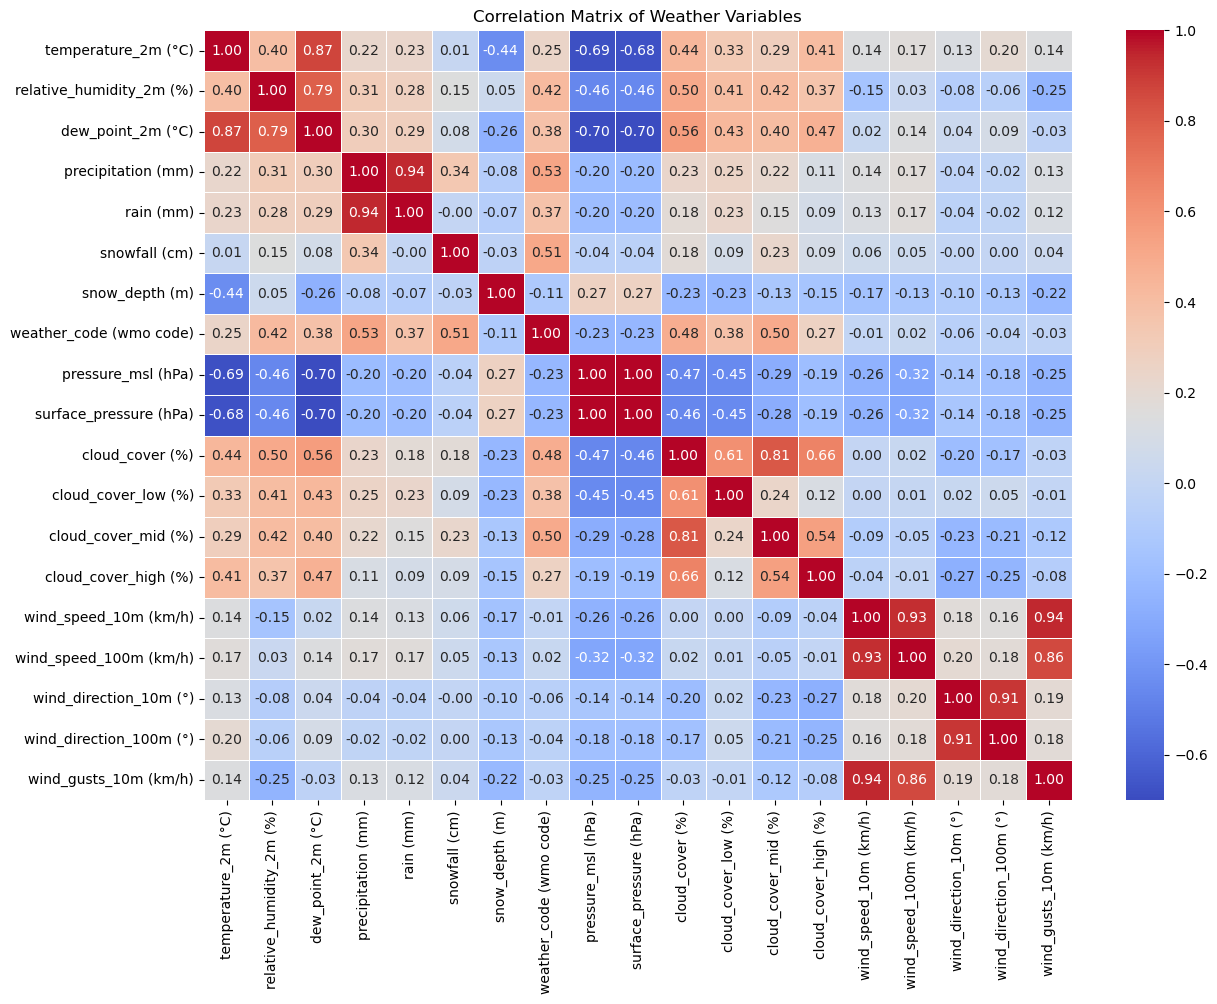

In [40]:
# Create a subset of the DataFrame with the variables of interest
subset_df = merged_df[['temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 
                       'precipitation (mm)', 'rain (mm)', 'snowfall (cm)', 'snow_depth (m)', 
                       'weather_code (wmo code)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 
                       'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 
                       'cloud_cover_high (%)', 'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 
                       'wind_direction_10m (°)', 'wind_direction_100m (°)', 'wind_gusts_10m (km/h)']]

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Weather Variables')
plt.show()

### Histograms for Categorical Data

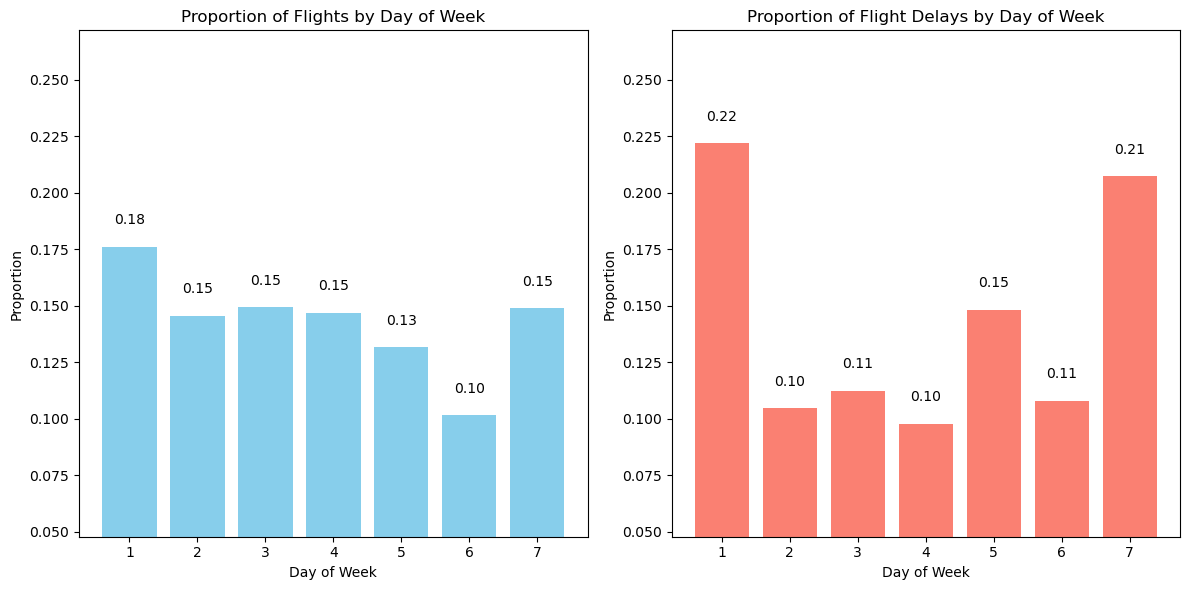

In [55]:
import matplotlib.pyplot as plt

# Group by DayOfWeek and count rows
day_counts = merged_df['DayOfWeek'].value_counts()

# Group by DayOfWeek and count rows with DepDel15 = 1
day_counts_depdel15 = merged_df[merged_df['DepDel15'] == 1]['DayOfWeek'].value_counts()

# Calculate total count of rows
total_count = day_counts.sum()

# Calculate proportions
proportions = day_counts / total_count
proportions_depdel15 = day_counts_depdel15 / day_counts_depdel15.sum()  # Normalize by total count of rows with DepDel15=1

# Set up figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot first histogram (total counts)
axs[0].bar(proportions.index, proportions.values, color='skyblue')
axs[0].set_title('Proportion of Flights by Day of Week')
axs[0].set_xlabel('Day of Week')
axs[0].set_ylabel('Proportion')

# Add data labels to first histogram
for i, proportion in enumerate(proportions.values):
    axs[0].text(proportions.index[i], proportion + 0.01, f'{proportion:.2f}', ha='center')

# Plot second histogram (counts of DepDel15 = 1)
axs[1].bar(proportions_depdel15.index, proportions_depdel15.values, color='salmon')
axs[1].set_title('Proportion of Flight Delays by Day of Week')
axs[1].set_xlabel('Day of Week')
axs[1].set_ylabel('Proportion')

# Add data labels to second histogram
for i, proportion_depdel15 in enumerate(proportions_depdel15.values):
    axs[1].text(proportions_depdel15.index[i], proportion_depdel15 + 0.01, f'{proportion_depdel15:.2f}', ha='center')

# Set y-axis limits
y_min = min(min(proportions.values), min(proportions_depdel15.values))
y_max = max(max(proportions.values), max(proportions_depdel15.values))
axs[0].set_ylim(y_min - 0.05, y_max + 0.05)
axs[1].set_ylim(y_min - 0.05, y_max + 0.05)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


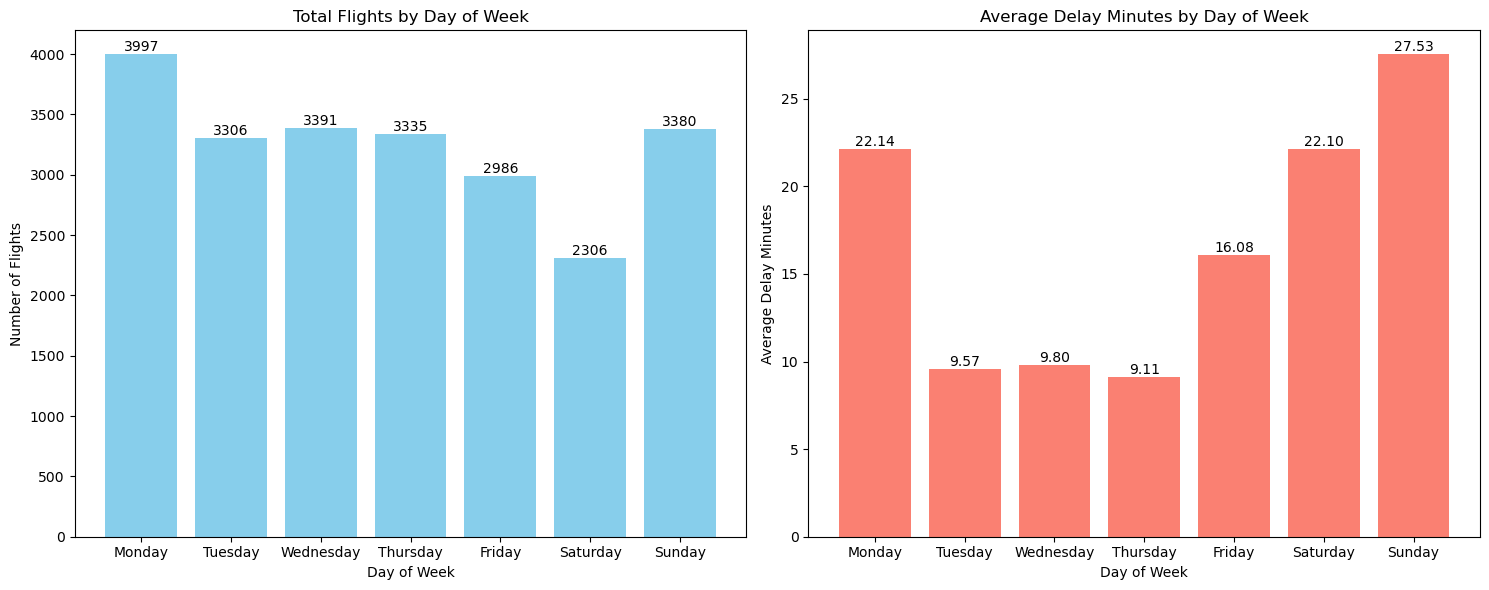

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by DayOfWeek and count rows
day_counts = merged_df['DayOfWeek'].value_counts()

# Group by DayOfWeek and calculate average DepDelayMinutes
avg_delay_by_day = merged_df.groupby('DayOfWeek')['DepDelayMinutes'].mean()

# Set up figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot first histogram (total counts)
bars1 = axs[0].bar(day_counts.index, day_counts.values, color='skyblue')
axs[0].set_title('Total Flights by Day of Week')
axs[0].set_xlabel('Day of Week')
axs[0].set_ylabel('Number of Flights')
axs[0].set_xticks(range(1, 8))
axs[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Add data labels to the first histogram
for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Plot second histogram (average delay)
bars2 = axs[1].bar(avg_delay_by_day.index, avg_delay_by_day.values, color='salmon')
axs[1].set_title('Average Delay Minutes by Day of Week')
axs[1].set_xlabel('Day of Week')
axs[1].set_ylabel('Average Delay Minutes')
axs[1].set_xticks(range(1, 8))
axs[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Add data labels to the second histogram
for bar in bars2:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Show plots
plt.tight_layout()
plt.show()


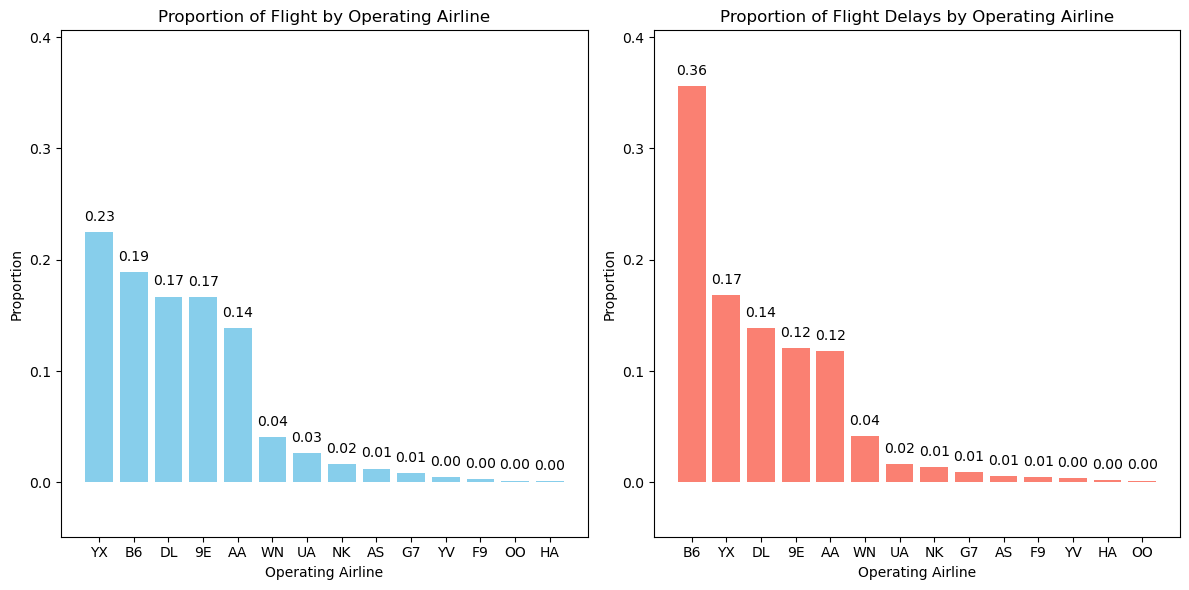

In [63]:
import matplotlib.pyplot as plt

# Group by Operating_Airline and count rows
airline_counts = merged_df['Operating_Airline '].value_counts()

# Group by Operating_Airline and count rows with DepDel15 = 1
airline_counts_depdel15 = merged_df[merged_df['DepDel15'] == 1]['Operating_Airline '].value_counts()

# Calculate total count of rows
total_count = airline_counts.sum()

# Calculate proportions
proportions = airline_counts / total_count
proportions_depdel15 = airline_counts_depdel15 / airline_counts_depdel15.sum()  # Normalize by total count of rows with DepDel15=1

# Set up figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot first histogram (total counts)
axs[0].bar(proportions.index, proportions.values, color='skyblue')
axs[0].set_title('Proportion of Flight by Operating Airline')
axs[0].set_xlabel('Operating Airline')
axs[0].set_ylabel('Proportion')

# Add data labels to first histogram
for i, proportion in enumerate(proportions.values):
    axs[0].text(i, proportion + 0.01, f'{proportion:.2f}', ha='center')

# Plot second histogram (counts of DepDel15 = 1)
axs[1].bar(proportions_depdel15.index, proportions_depdel15.values, color='salmon')
axs[1].set_title('Proportion of Flight Delays by Operating Airline')
axs[1].set_xlabel('Operating Airline')
axs[1].set_ylabel('Proportion')

# Add data labels to second histogram
for i, proportion_depdel15 in enumerate(proportions_depdel15.values):
    axs[1].text(i, proportion_depdel15 + 0.01, f'{proportion_depdel15:.2f}', ha='center')

# Set y-axis limits
y_min = min(min(proportions.values), min(proportions_depdel15.values))
y_max = max(max(proportions.values), max(proportions_depdel15.values))
axs[0].set_ylim(y_min - 0.05, y_max + 0.05)
axs[1].set_ylim(y_min - 0.05, y_max + 0.05)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


C:\Users\002736125\AppData\Local\Temp\ipykernel_25268\1486750439.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(airline_counts.index[::-1], rotation=90)  # Rotate x-axis labels
C:\Users\002736125\AppData\Local\Temp\ipykernel_25268\1486750439.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(avg_delay_by_airline.index[::-1], rotation=90)  # Rotate x-axis labels


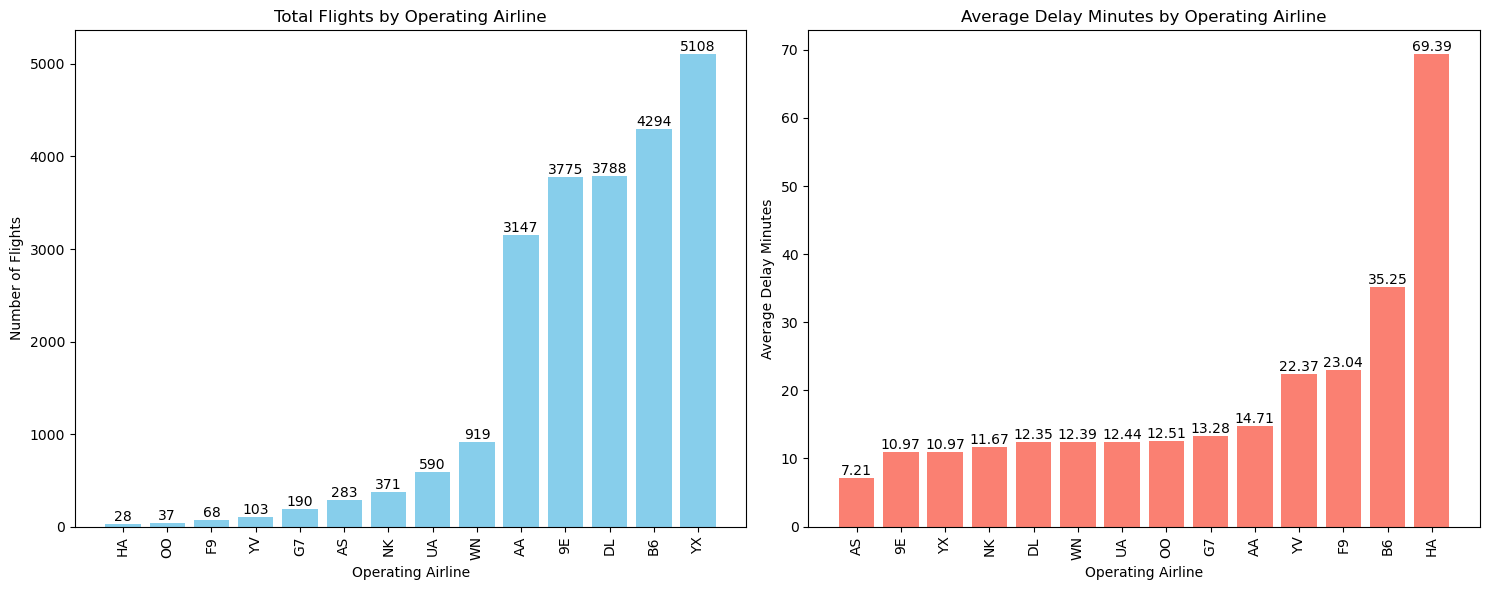

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by Operating_Airline and count rows
airline_counts = merged_df['Operating_Airline '].value_counts()

# Group by Operating_Airline and calculate average DepDelayMinutes
avg_delay_by_airline = merged_df.groupby('Operating_Airline ')['DepDelayMinutes'].mean().sort_values(ascending=False)

# Set up figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot first histogram (total counts)
bars1 = axs[0].bar(airline_counts.index, airline_counts.values[::-1], color='skyblue')
axs[0].set_title('Total Flights by Operating Airline')
axs[0].set_xlabel('Operating Airline')
axs[0].set_ylabel('Number of Flights')
axs[0].set_xticklabels(airline_counts.index[::-1], rotation=90)  # Rotate x-axis labels

# Add data labels to the first histogram
for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height}', ha='center', va='bottom')

# Plot second histogram (average delay)
bars2 = axs[1].bar(avg_delay_by_airline.index, avg_delay_by_airline.values[::-1], color='salmon')
axs[1].set_title('Average Delay Minutes by Operating Airline')
axs[1].set_xlabel('Operating Airline')
axs[1].set_ylabel('Average Delay Minutes')
axs[1].set_xticklabels(avg_delay_by_airline.index[::-1], rotation=90)  # Rotate x-axis labels

# Add data labels to the second histogram
for bar in bars2:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


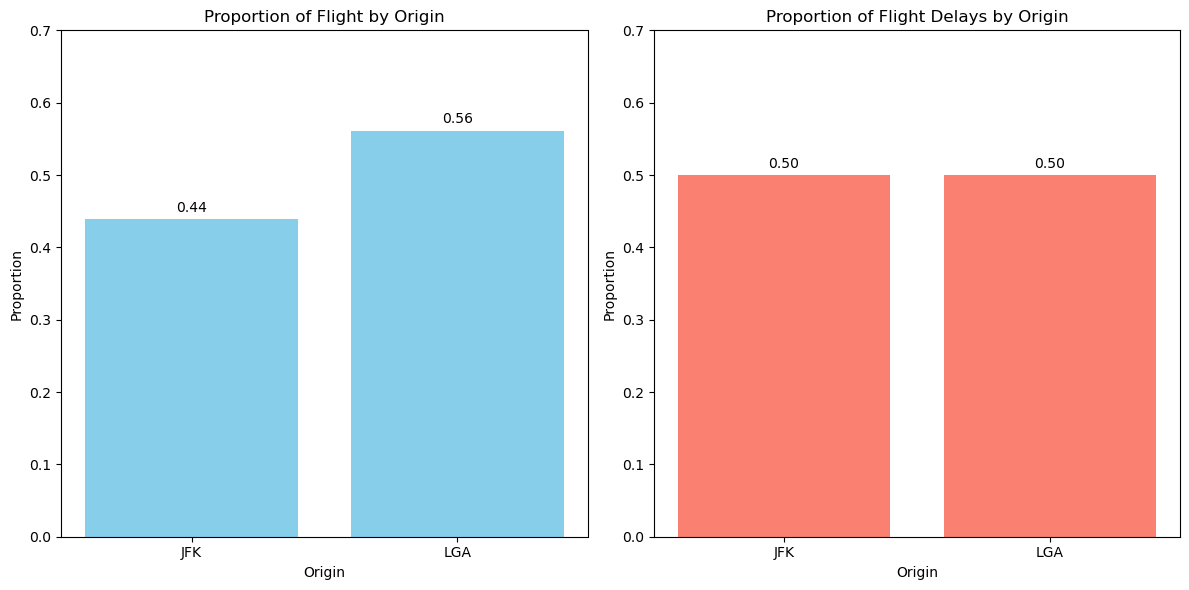

In [66]:
import matplotlib.pyplot as plt

# Group by Origin and count rows
origin_counts = merged_df['Origin'].value_counts()

# Group by Origin and count rows with DepDel15 = 1
origin_counts_depdel15 = merged_df[merged_df['DepDel15'] == 1]['Origin'].value_counts()

# Sort counts by index (origin airports)
origin_counts = origin_counts.sort_index()
origin_counts_depdel15 = origin_counts_depdel15.sort_index()

# Calculate total count of rows
total_count = origin_counts.sum()

# Calculate proportions
proportions = origin_counts / total_count
proportions_depdel15 = origin_counts_depdel15 / origin_counts_depdel15.sum()  # Normalize by total count of rows with DepDel15=1

# Set up figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot first histogram (total counts)
axs[0].bar(proportions.index, proportions.values, color='skyblue')
axs[0].set_title('Proportion of Flight by Origin')
axs[0].set_xlabel('Origin')
axs[0].set_ylabel('Proportion')

# Add data labels to first histogram
for i, proportion in enumerate(proportions.values):
    axs[0].text(i, proportion + 0.01, f'{proportion:.2f}', ha='center')

# Plot second histogram (counts of DepDel15 = 1)
axs[1].bar(proportions_depdel15.index, proportions_depdel15.values, color='salmon')
axs[1].set_title('Proportion of Flight Delays by Origin')
axs[1].set_xlabel('Origin')
axs[1].set_ylabel('Proportion')

# Add data labels to second histogram
for i, proportion_depdel15 in enumerate(proportions_depdel15.values):
    axs[1].text(i, proportion_depdel15 + 0.01, f'{proportion_depdel15:.2f}', ha='center')

# Set y-axis limits
axs[0].set_ylim(0, 0.7)
axs[1].set_ylim(0, 0.7)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


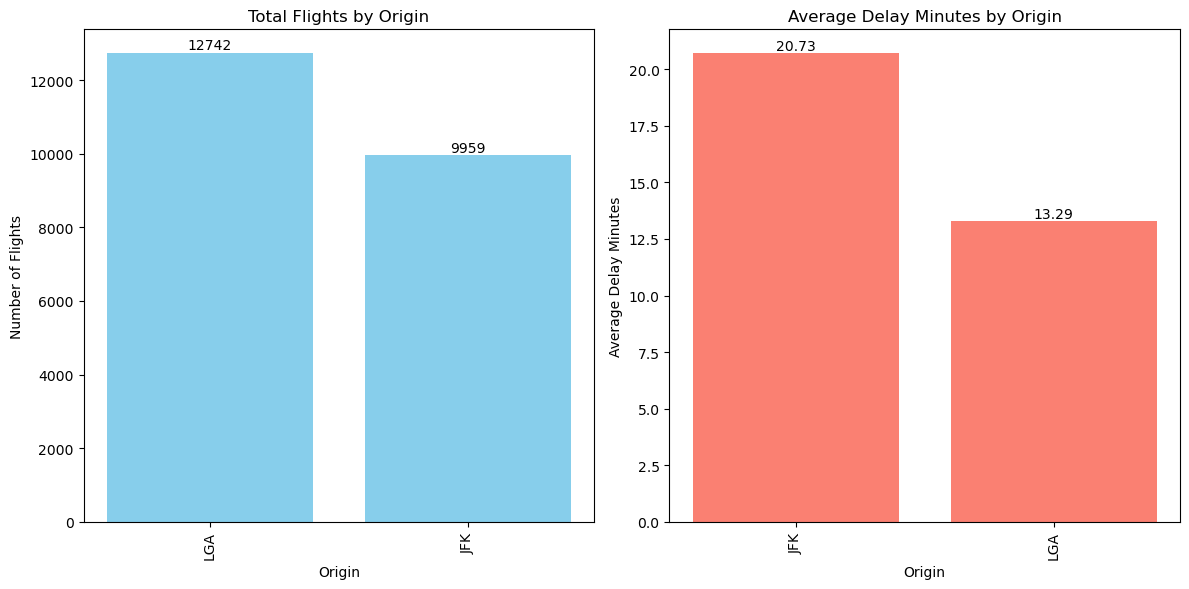

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by Origin and count rows
origin_counts = merged_df['Origin'].value_counts()

# Group by Origin and calculate average DepDelayMinutes
avg_delay_by_origin = merged_df.groupby('Origin')['DepDelayMinutes'].mean()

# Set up figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot first histogram (total counts)
bars1 = axs[0].bar(origin_counts.index, origin_counts.values, color='skyblue')
axs[0].set_title('Total Flights by Origin')
axs[0].set_xlabel('Origin')
axs[0].set_ylabel('Number of Flights')
axs[0].tick_params(axis='x', rotation=90)

# Add data labels to the first histogram
for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height}', ha='center', va='bottom')

# Plot second histogram (average delay)
bars2 = axs[1].bar(avg_delay_by_origin.index, avg_delay_by_origin.values, color='salmon')
axs[1].set_title('Average Delay Minutes by Origin')
axs[1].set_xlabel('Origin')
axs[1].set_ylabel('Average Delay Minutes')
axs[1].tick_params(axis='x', rotation=90)

# Add data labels to the second histogram
for bar in bars2:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


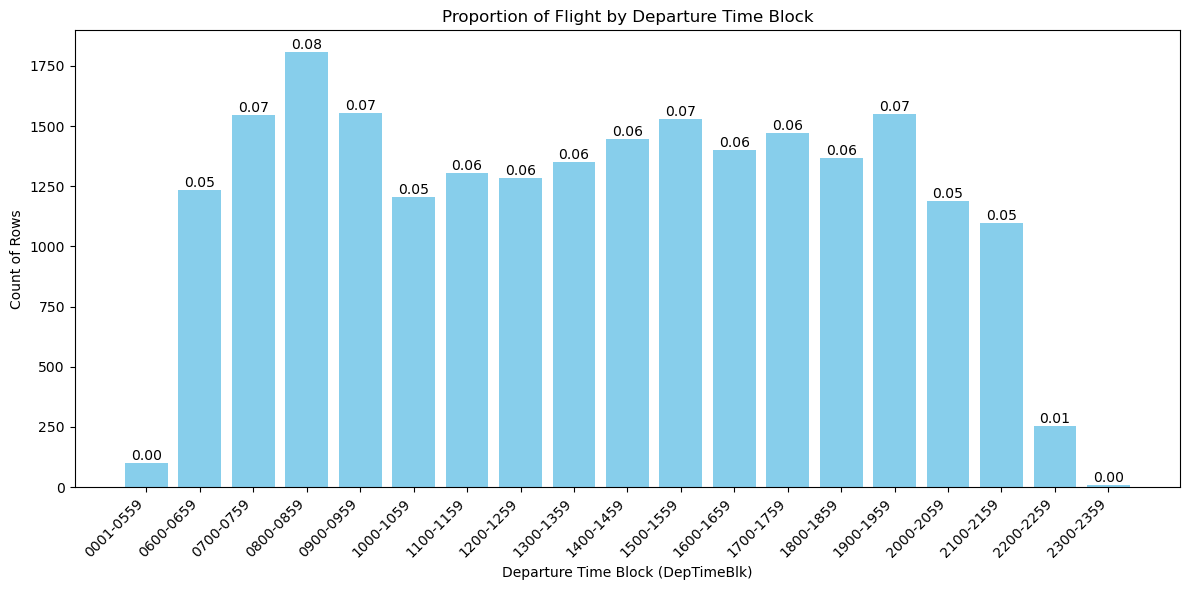

In [69]:
import matplotlib.pyplot as plt

# Define the order of DepTimeBlk
dep_time_order = [
    '0001-0559', '0600-0659', '0700-0759', '0800-0859', '0900-0959', 
    '1000-1059', '1100-1159', '1200-1259', '1300-1359', '1400-1459', 
    '1500-1559', '1600-1659', '1700-1759', '1800-1859', '1900-1959', 
    '2000-2059', '2100-2159', '2200-2259', '2300-2359'
]

# Group by DepTimeBlk and count rows
dep_time_counts = merged_df['DepTimeBlk'].value_counts()

# Sort counts by index (DepTimeBlk)
dep_time_counts = dep_time_counts.sort_index()

# Calculate proportion of rows
total_rows = dep_time_counts.sum()
proportions = dep_time_counts / total_rows

# Set up figure and axes
plt.figure(figsize=(12, 6))

# Plot the bar chart
bars = plt.bar(dep_time_counts.index, dep_time_counts.values, color='skyblue')

# Add data labels with proportions
for bar, prop in zip(bars, proportions):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{prop:.2f}', ha='center', va='bottom')

# Set x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Departure Time Block (DepTimeBlk)')
plt.ylabel('Count of Rows')
plt.title('Proportion of Flight by Departure Time Block')

# Show plot
plt.tight_layout()
plt.show()


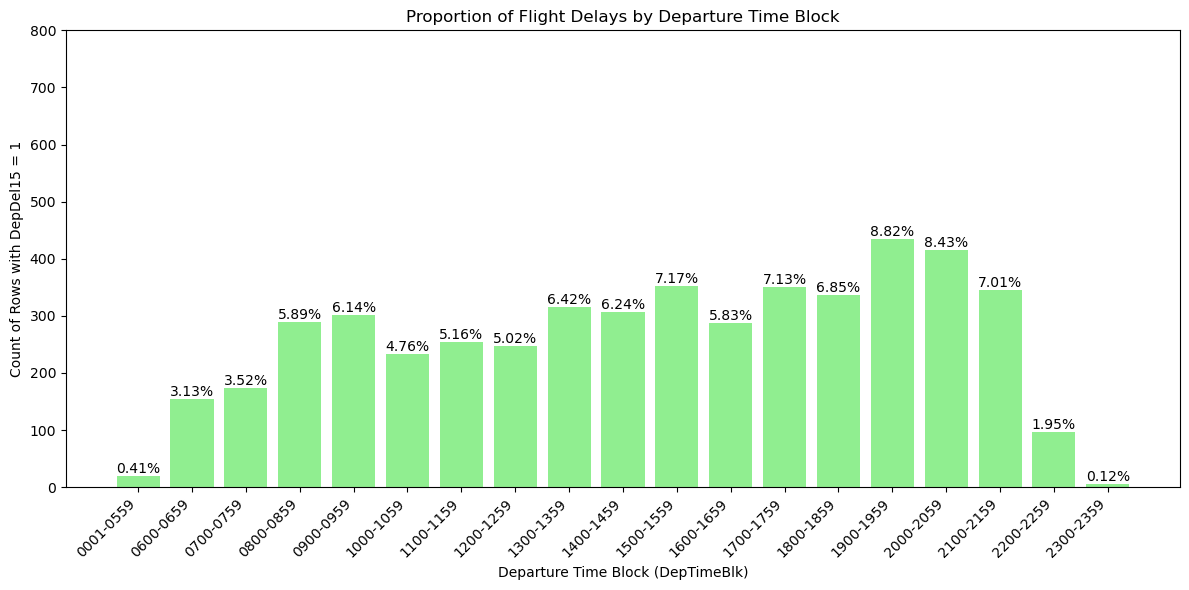

In [89]:
import matplotlib.pyplot as plt

# Group by DepTimeBlk and count rows with DepDel15 equal to 1
dep_del15_counts = merged_df[merged_df['DepDel15'] == 1]['DepTimeBlk'].value_counts()

# Sort counts by index (DepTimeBlk)
dep_del15_counts = dep_del15_counts.sort_index()

# Calculate proportion of rows
total_rows_with_del15 = dep_del15_counts.sum()
proportions_del15 = dep_del15_counts / total_rows_with_del15

# Set up figure and axes
plt.figure(figsize=(12, 6))

# Plot the bar chart
bars = plt.bar(dep_del15_counts.index, dep_del15_counts.values, color='lightgreen')

# Add data labels with proportions
for bar, prop in zip(bars, proportions_del15):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{prop:.2%}', ha='center', va='bottom')

# Set y-axis limits
plt.ylim(0, 800)  # Cap the y-axis at 800

# Set x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Departure Time Block (DepTimeBlk)')
plt.ylabel('Count of Rows with DepDel15 = 1')
plt.title('Proportion of Flight Delays by Departure Time Block')

# Show plot
plt.tight_layout()
plt.show()


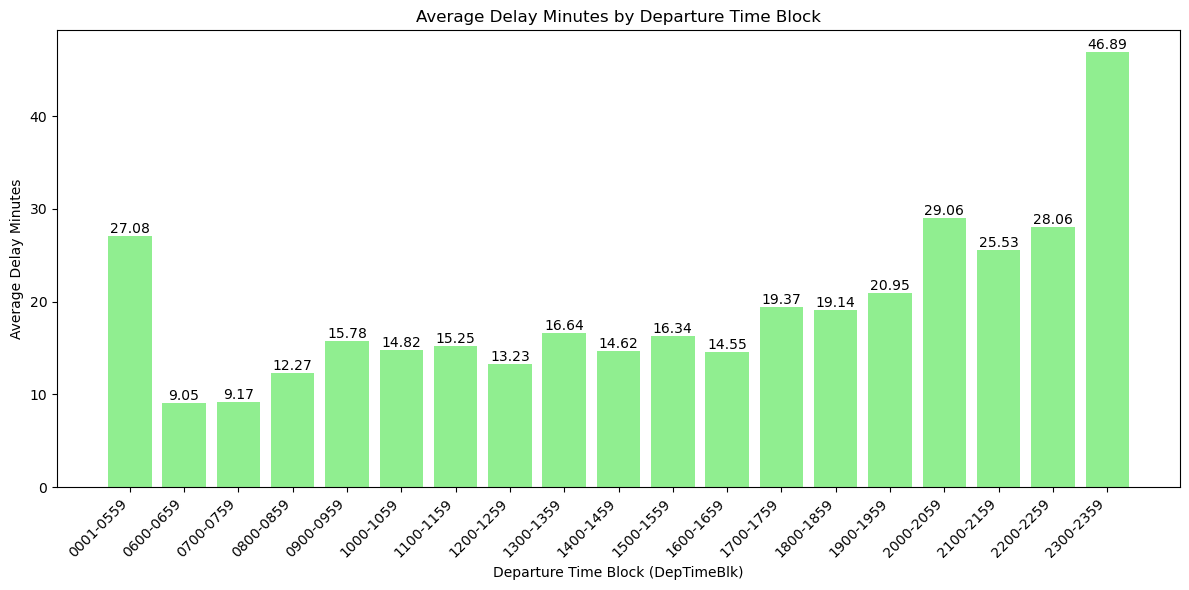

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by DepTimeBlk and calculate average DepDelayMinutes for all flights
avg_delay_by_time_block = merged_df.groupby('DepTimeBlk')['DepDelayMinutes'].mean()

# Sort averages by index (DepTimeBlk)
avg_delay_by_time_block = avg_delay_by_time_block.sort_index()

# Set up figure and axes
plt.figure(figsize=(12, 6))

# Plot the bar chart
bars = plt.bar(avg_delay_by_time_block.index, avg_delay_by_time_block.values, color='lightgreen')

# Add data labels with average delay minutes
for bar, avg_delay in zip(bars, avg_delay_by_time_block):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{avg_delay:.2f}', ha='center', va='bottom')

# Set x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Departure Time Block (DepTimeBlk)')
plt.ylabel('Average Delay Minutes')
plt.title('Average Delay Minutes by Departure Time Block')

# Show plot
plt.tight_layout()
plt.show()


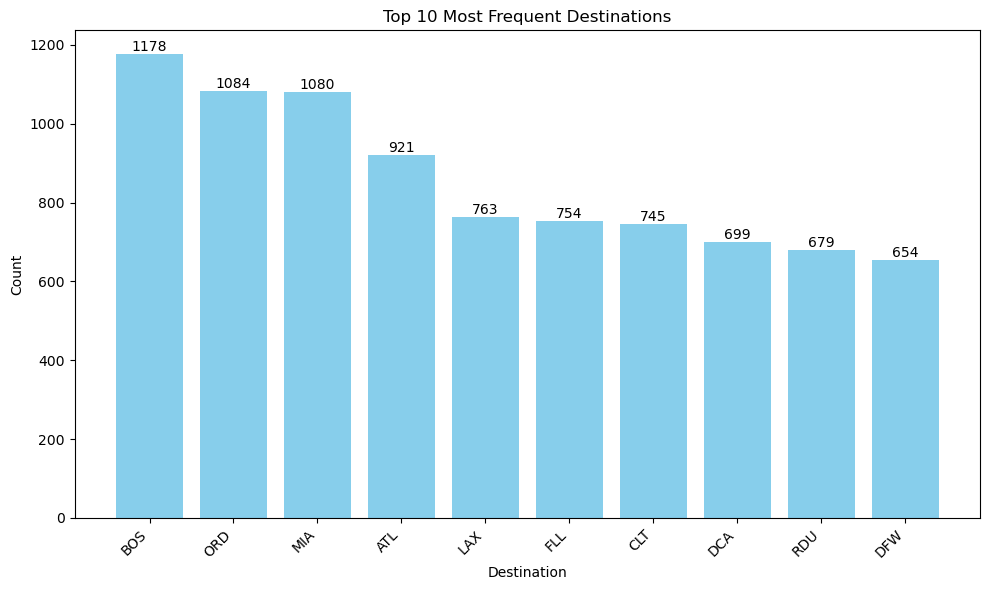

In [74]:
import matplotlib.pyplot as plt

# Get top 10 most frequent destinations
top_destinations = merged_df['Dest'].value_counts().head(10)

# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot the bar chart
bars = plt.bar(top_destinations.index, top_destinations.values, color='skyblue')

# Add data labels with counts
for bar, count in zip(bars, top_destinations):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, count, ha='center', va='bottom')

# Set x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Destinations')

# Show plot
plt.tight_layout()
plt.show()


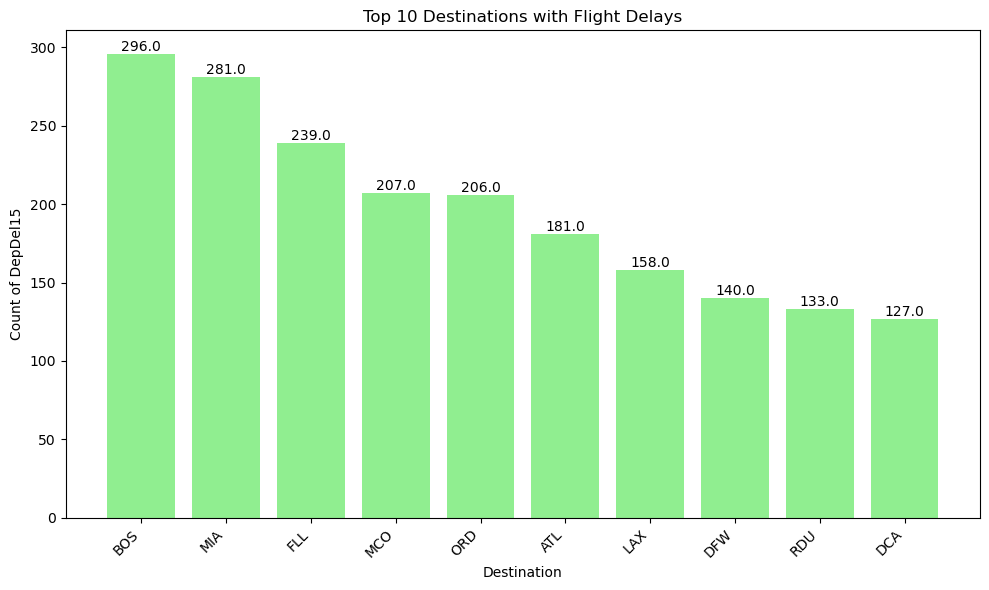

In [76]:
import matplotlib.pyplot as plt

# Get top 10 destinations based on count of DepDel15
top_destinations = merged_df.groupby('Dest')['DepDel15'].sum().nlargest(10)

# Set up figure and axes
plt.figure(figsize=(10, 6))

# Plot the bar chart
bars = plt.bar(top_destinations.index, top_destinations.values, color='lightgreen')

# Add data labels with counts
for bar, count in zip(bars, top_destinations):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, count, ha='center', va='bottom')

# Set x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Destination')
plt.ylabel('Count of DepDel15')
plt.title('Top 10 Destinations with Flight Delays')

# Show plot
plt.tight_layout()
plt.show()


C:\Users\002736125\AppData\Local\Temp\ipykernel_25268\509675471.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(top_destinations_count.index, rotation=45, ha='right')
C:\Users\002736125\AppData\Local\Temp\ipykernel_25268\509675471.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(top_destinations_delay.index, rotation=45, ha='right')


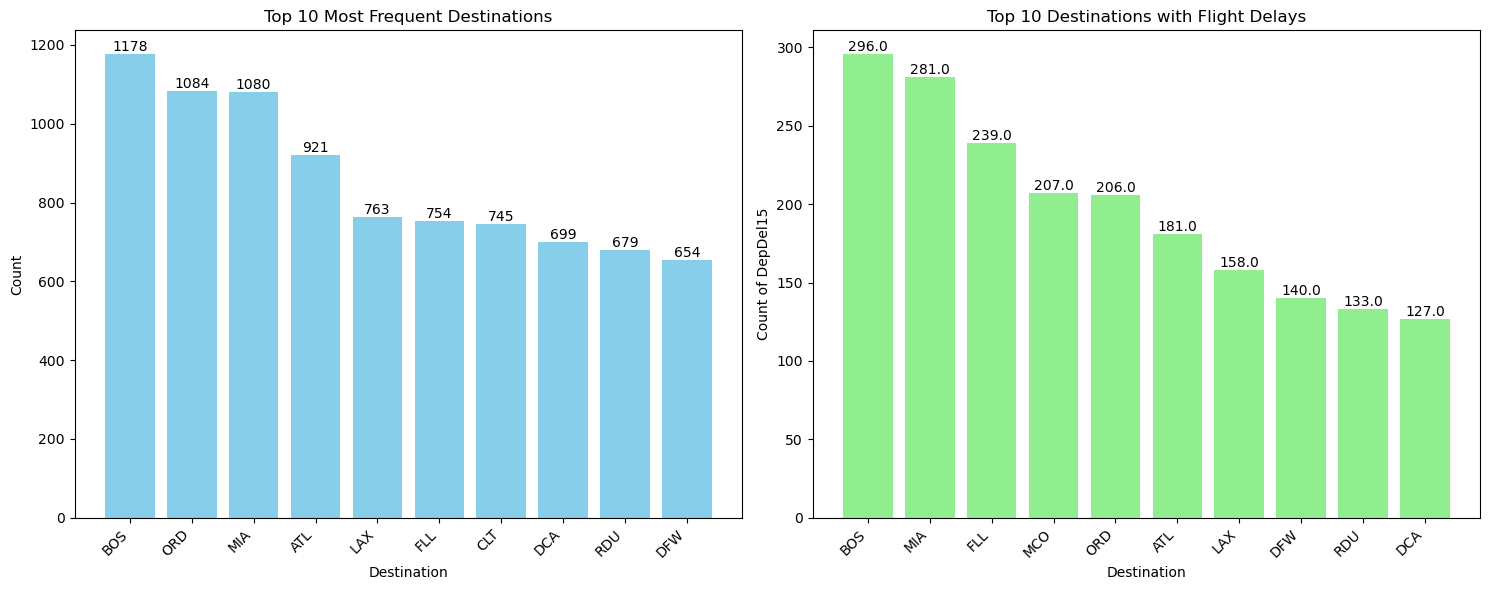

In [81]:
import matplotlib.pyplot as plt

# Get top 10 most frequent destinations
top_destinations_count = merged_df['Dest'].value_counts().head(10)

# Get top 10 destinations based on count of DepDel15
top_destinations_delay = merged_df.groupby('Dest')['DepDel15'].sum().nlargest(10)

# Set up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first bar chart
bars1 = axes[0].bar(top_destinations_count.index, top_destinations_count.values, color='skyblue')

# Add data labels with counts
for bar, count in zip(bars1, top_destinations_count):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, count, ha='center', va='bottom')

# Set x-axis labels
axes[0].set_xticklabels(top_destinations_count.index, rotation=45, ha='right')
axes[0].set_xlabel('Destination')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Frequent Destinations')

# Plot the second bar chart
bars2 = axes[1].bar(top_destinations_delay.index, top_destinations_delay.values, color='lightgreen')

# Add data labels with counts
for bar, count in zip(bars2, top_destinations_delay):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, count, ha='center', va='bottom')

# Set x-axis labels
axes[1].set_xticklabels(top_destinations_delay.index, rotation=45, ha='right')
axes[1].set_xlabel('Destination')
axes[1].set_ylabel('Count of DepDel15')
axes[1].set_title('Top 10 Destinations with Flight Delays')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


C:\Users\002736125\AppData\Local\Temp\ipykernel_25268\1380784649.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(top_destinations_count.index, rotation=45, ha='right')
C:\Users\002736125\AppData\Local\Temp\ipykernel_25268\1380784649.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(top_destinations_delay.index, rotation=45, ha='right')


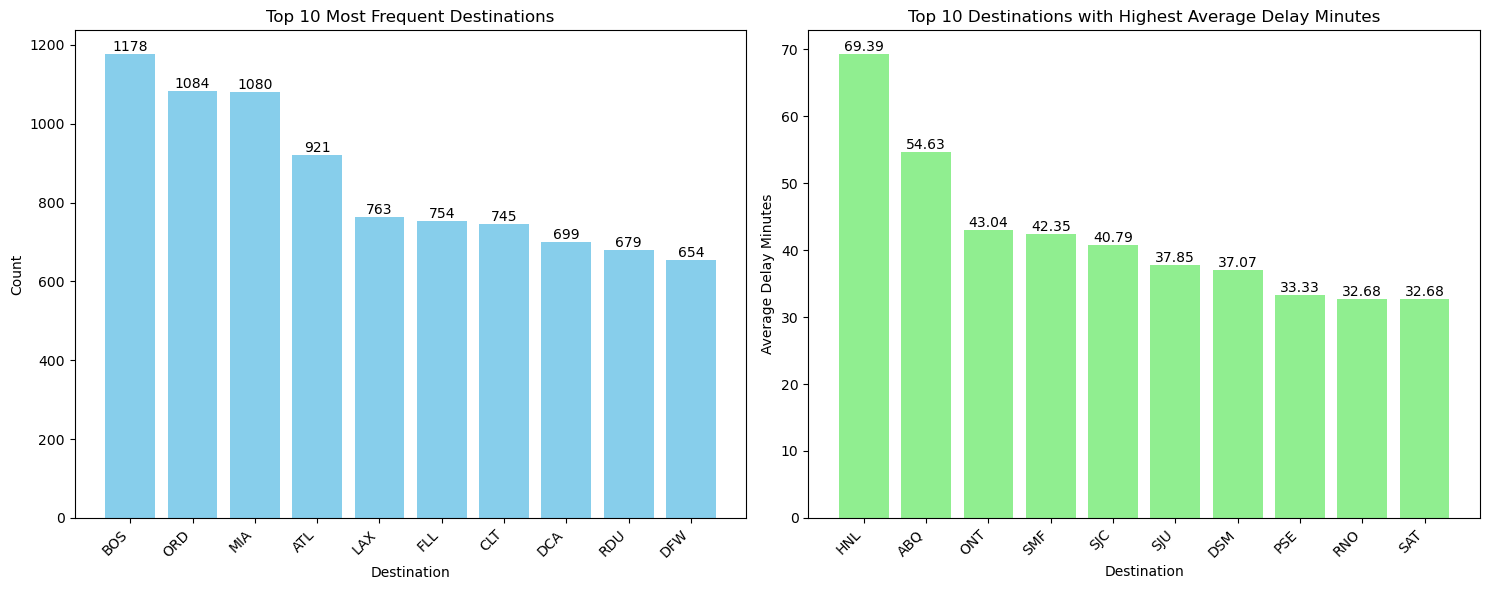

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# Get top 10 most frequent destinations
top_destinations_count = merged_df['Dest'].value_counts().head(10)

# Get top 10 destinations based on average DepDelayMinutes
top_destinations_delay = merged_df.groupby('Dest')['DepDelayMinutes'].mean().nlargest(10)

# Set up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first bar chart
bars1 = axes[0].bar(top_destinations_count.index, top_destinations_count.values, color='skyblue')

# Add data labels with counts
for bar, count in zip(bars1, top_destinations_count):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, count, ha='center', va='bottom')

# Set x-axis labels
axes[0].set_xticklabels(top_destinations_count.index, rotation=45, ha='right')
axes[0].set_xlabel('Destination')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Frequent Destinations')

# Plot the second bar chart
bars2 = axes[1].bar(top_destinations_delay.index, top_destinations_delay.values, color='lightgreen')

# Add data labels with average delay minutes
for bar, delay_minutes in zip(bars2, top_destinations_delay):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, f'{delay_minutes:.2f}', ha='center', va='bottom')

# Set x-axis labels
axes[1].set_xticklabels(top_destinations_delay.index, rotation=45, ha='right')
axes[1].set_xlabel('Destination')
axes[1].set_ylabel('Average Delay Minutes')
axes[1].set_title('Top 10 Destinations with Highest Average Delay Minutes')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


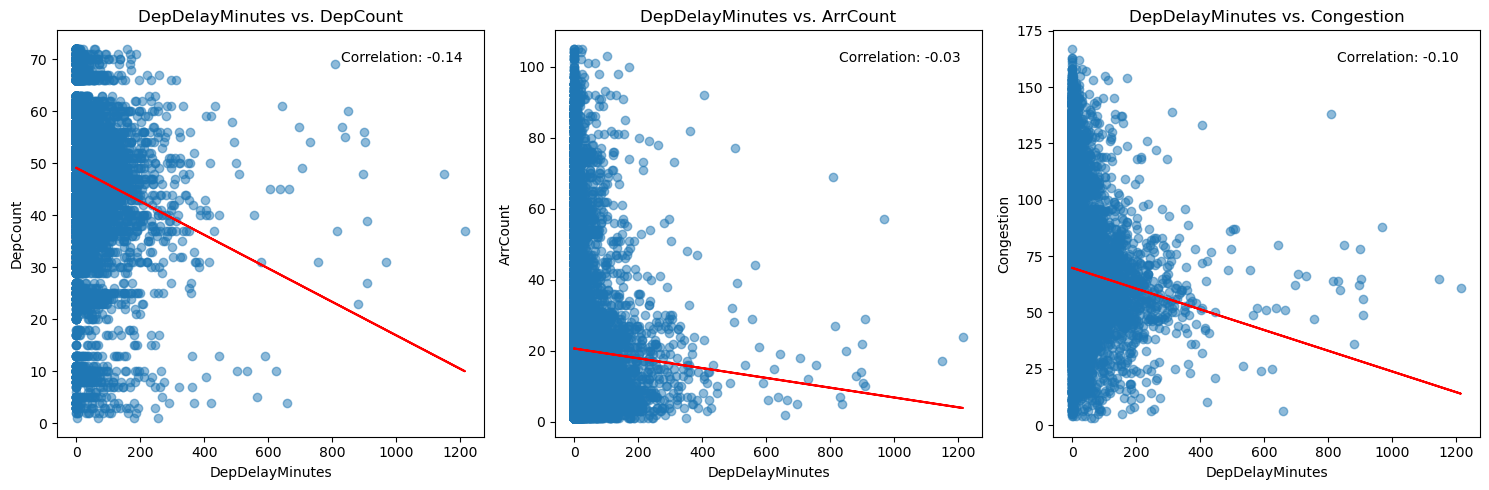

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set up figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for DepDelayMinutes vs. DepCount
slope, intercept, r_value, _, _ = linregress(merged_df['DepDelayMinutes'], merged_df['DepCount'])
axes[0].scatter(merged_df['DepDelayMinutes'], merged_df['DepCount'], alpha=0.5)
axes[0].plot(merged_df['DepDelayMinutes'], slope * merged_df['DepDelayMinutes'] + intercept, color='red')
axes[0].set_xlabel('DepDelayMinutes')
axes[0].set_ylabel('DepCount')
axes[0].set_title('DepDelayMinutes vs. DepCount')
axes[0].text(0.95, 0.95, f'Correlation: {r_value:.2f}', horizontalalignment='right', verticalalignment='top', transform=axes[0].transAxes)

# Scatter plot for DepDelayMinutes vs. ArrCount
slope, intercept, r_value, _, _ = linregress(merged_df['DepDelayMinutes'], merged_df['ArrCount'])
axes[1].scatter(merged_df['DepDelayMinutes'], merged_df['ArrCount'], alpha=0.5)
axes[1].plot(merged_df['DepDelayMinutes'], slope * merged_df['DepDelayMinutes'] + intercept, color='red')
axes[1].set_xlabel('DepDelayMinutes')
axes[1].set_ylabel('ArrCount')
axes[1].set_title('DepDelayMinutes vs. ArrCount')
axes[1].text(0.95, 0.95, f'Correlation: {r_value:.2f}', horizontalalignment='right', verticalalignment='top', transform=axes[1].transAxes)

# Scatter plot for DepDelayMinutes vs. Congestion
slope, intercept, r_value, _, _ = linregress(merged_df['DepDelayMinutes'], merged_df['Congestion'])
axes[2].scatter(merged_df['DepDelayMinutes'], merged_df['Congestion'], alpha=0.5)
axes[2].plot(merged_df['DepDelayMinutes'], slope * merged_df['DepDelayMinutes'] + intercept, color='red')
axes[2].set_xlabel('DepDelayMinutes')
axes[2].set_ylabel('Congestion')
axes[2].set_title('DepDelayMinutes vs. Congestion')
axes[2].text(0.95, 0.95, f'Correlation: {r_value:.2f}', horizontalalignment='right', verticalalignment='top', transform=axes[2].transAxes)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


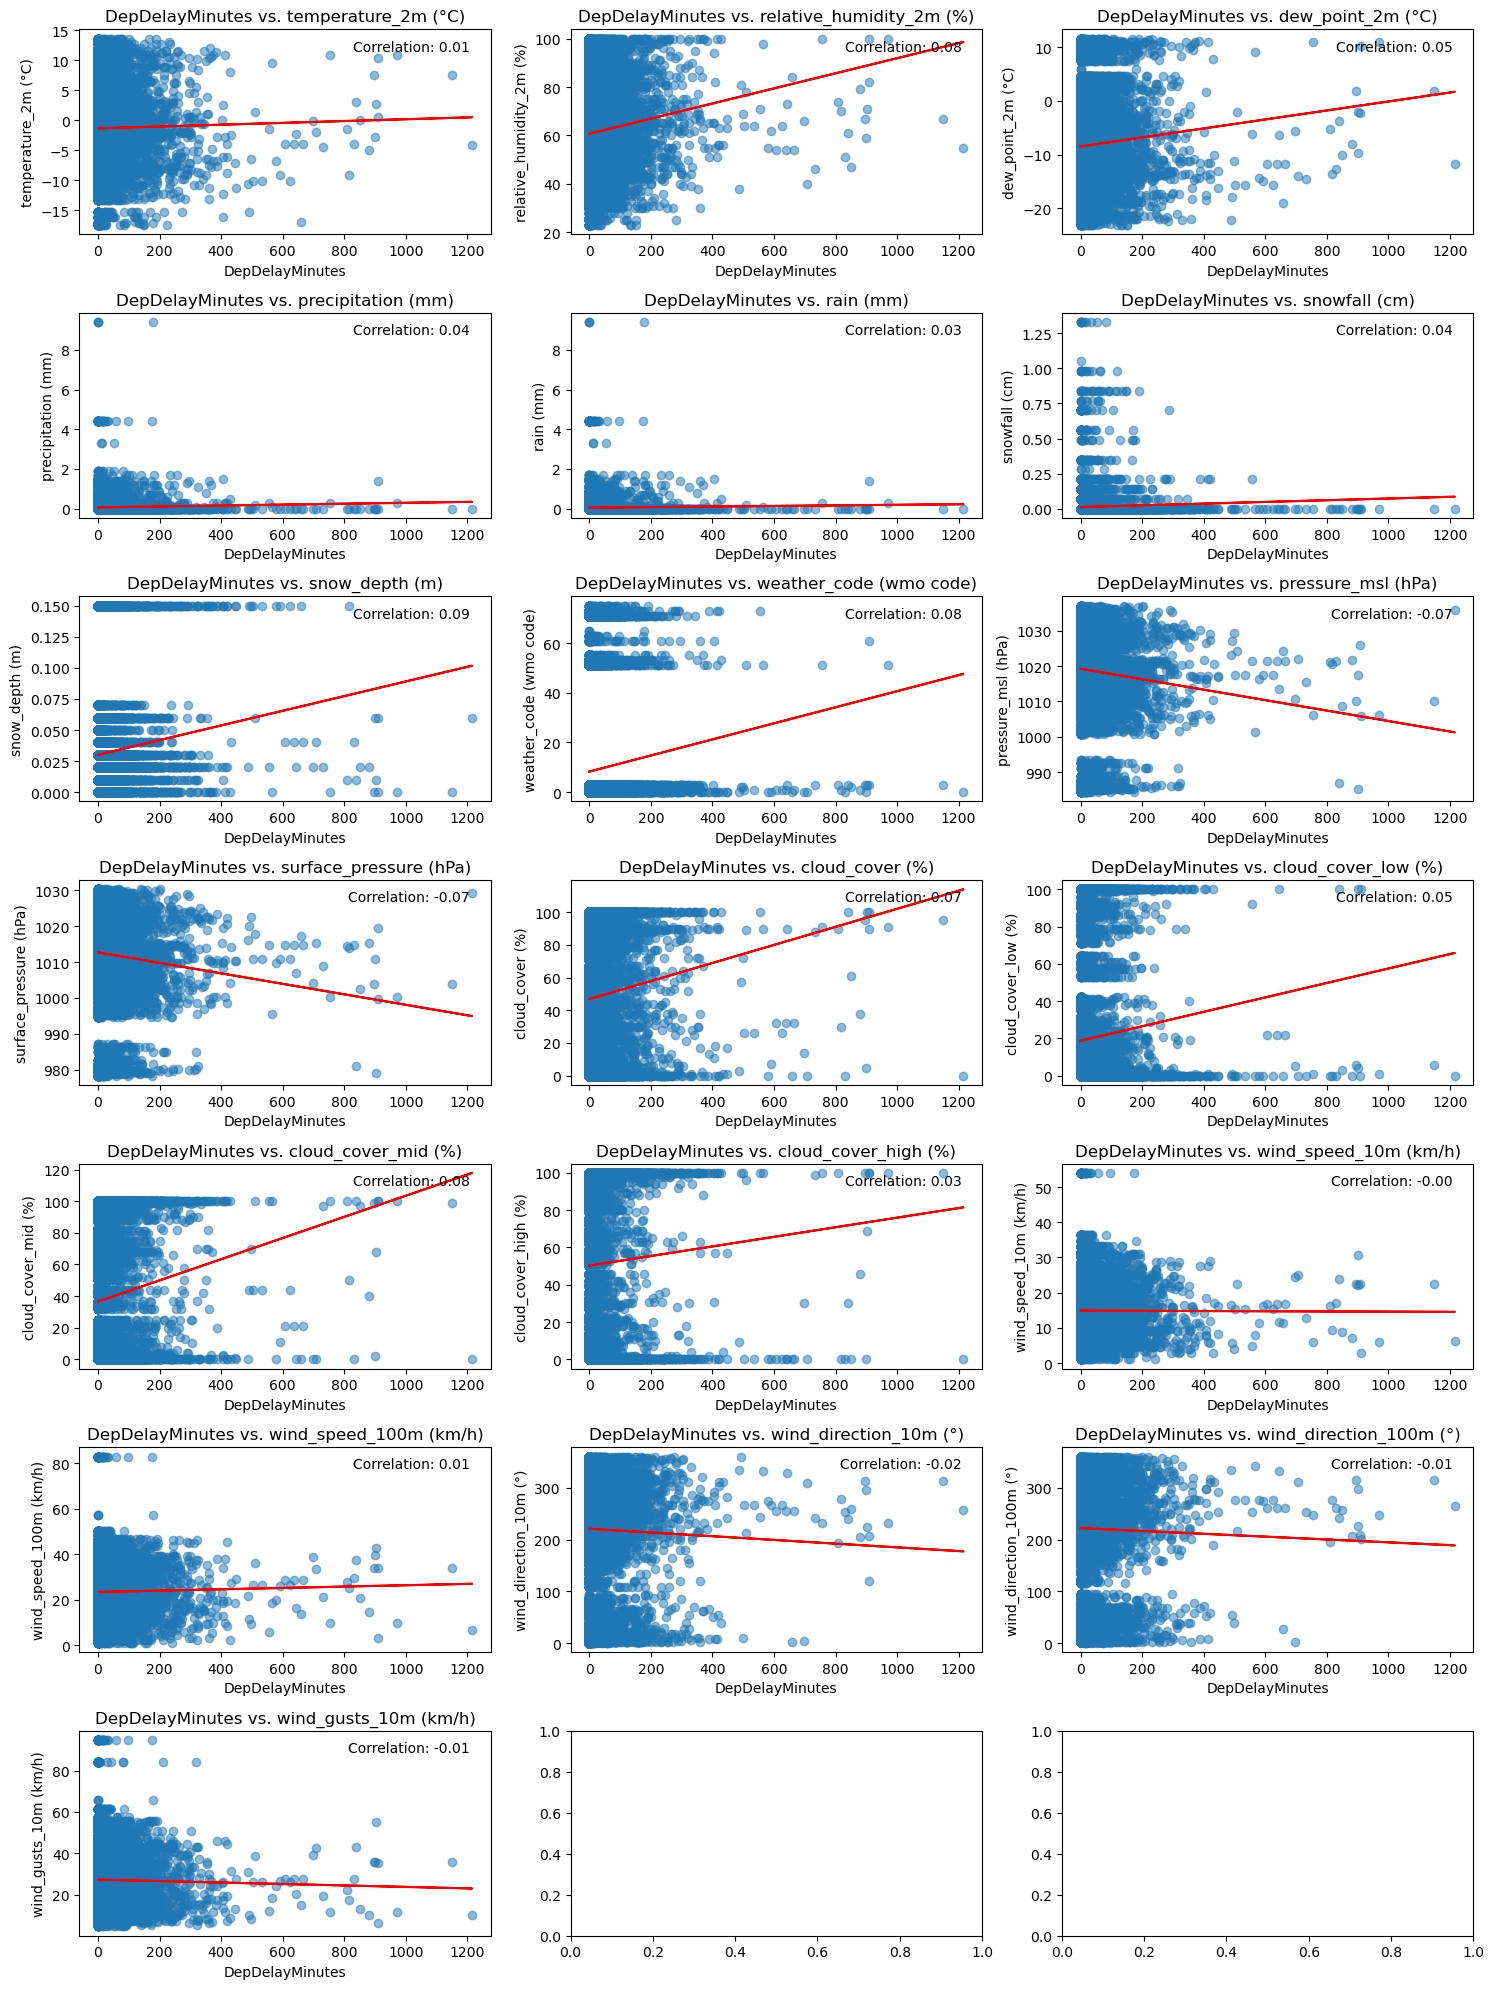

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the variables to plot
variables = [
    'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 
    'precipitation (mm)', 'rain (mm)', 'snowfall (cm)', 'snow_depth (m)', 
    'weather_code (wmo code)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 
    'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)', 
    'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_direction_10m (°)', 
    'wind_direction_100m (°)', 'wind_gusts_10m (km/h)'
]

# Create a grid of scatterplots
fig, axes = plt.subplots(7, 3, figsize=(15, 20))

# Flatten the axes array to iterate over them
axes = axes.flatten()

# Iterate over each variable
for i, variable in enumerate(variables):
    # Scatter plot with trend line
    slope, intercept, r_value, _, _ = linregress(merged_df['DepDelayMinutes'], merged_df[variable])
    axes[i].scatter(merged_df['DepDelayMinutes'], merged_df[variable], alpha=0.5)
    axes[i].plot(merged_df['DepDelayMinutes'], slope * merged_df['DepDelayMinutes'] + intercept, color='red')
    axes[i].set_xlabel('DepDelayMinutes')
    axes[i].set_ylabel(variable)
    axes[i].set_title(f'DepDelayMinutes vs. {variable}')
    axes[i].text(0.95, 0.95, f'Correlation: {r_value:.2f}', horizontalalignment='right', verticalalignment='top', transform=axes[i].transAxes)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


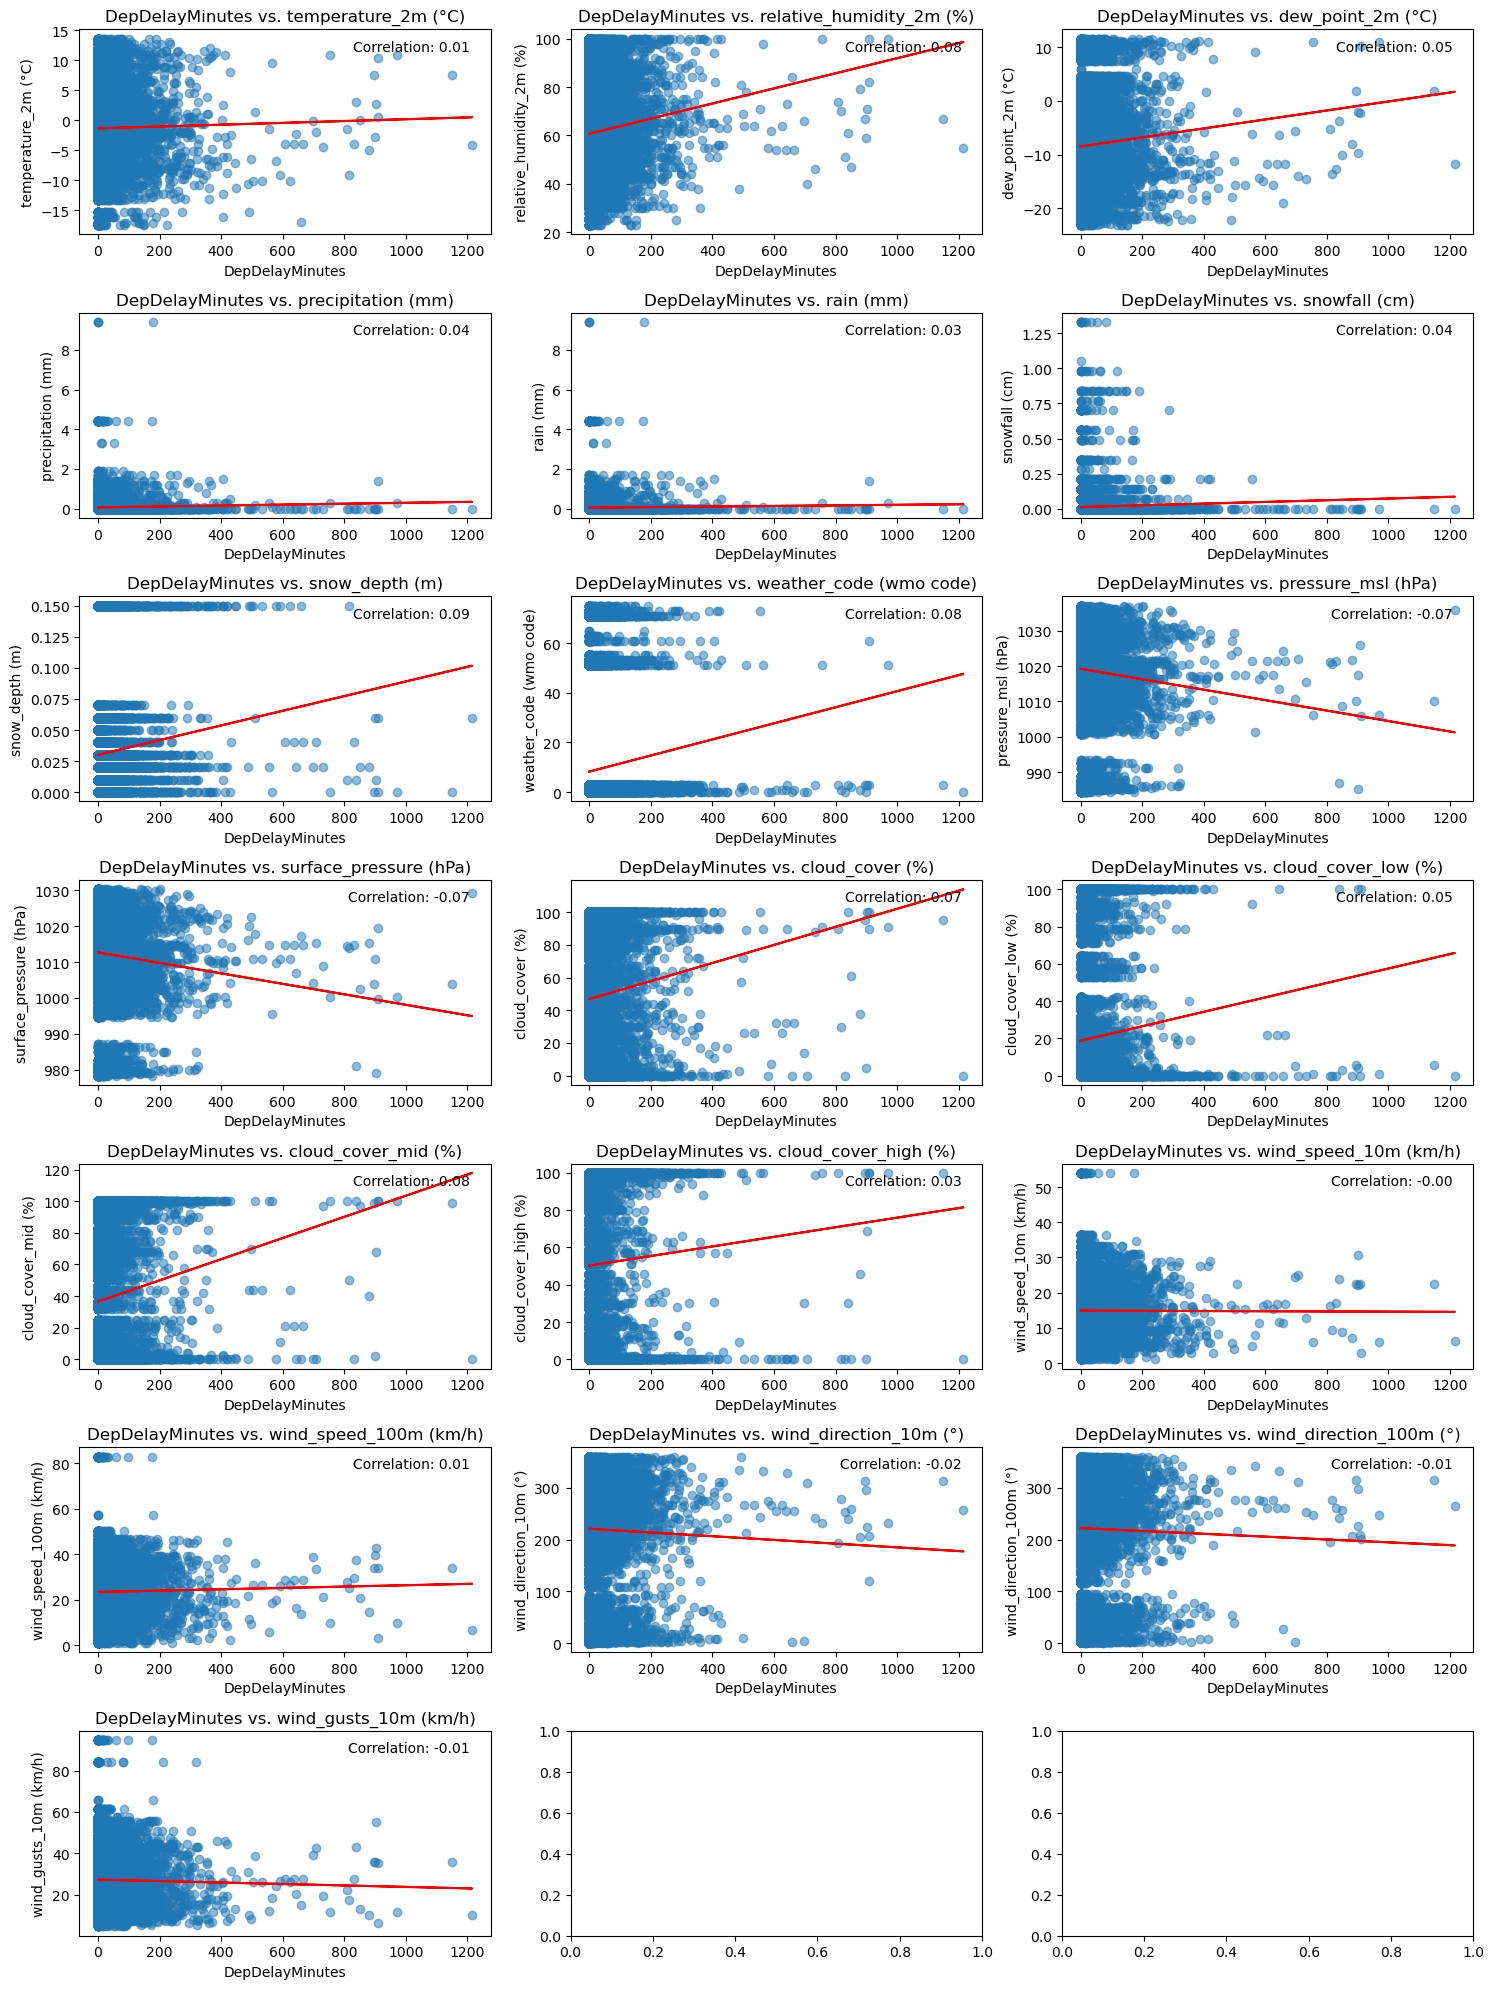

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# Define the variables to plot
variables = [
    'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 
    'precipitation (mm)', 'rain (mm)', 'snowfall (cm)', 'snow_depth (m)', 
    'weather_code (wmo code)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 
    'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)', 
    'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_direction_10m (°)', 
    'wind_direction_100m (°)', 'wind_gusts_10m (km/h)'
]

# Create a grid of scatterplots
fig, axes = plt.subplots(7, 3, figsize=(15, 20))

# Flatten the axes array to iterate over them
axes = axes.flatten()

# Iterate over each variable
for i, variable in enumerate(variables):
    # Scatter plot with trend line
    slope, intercept, r_value, _, _ = linregress(merged_df['DepDelayMinutes'], merged_df[variable])
    axes[i].scatter(merged_df['DepDelayMinutes'], merged_df[variable], alpha=0.5)
    axes[i].plot(merged_df['DepDelayMinutes'], slope * merged_df['DepDelayMinutes'] + intercept, color='red')
    axes[i].set_xlabel('DepDelayMinutes')
    axes[i].set_ylabel(variable)
    axes[i].set_title(f'DepDelayMinutes vs. {variable}')
    axes[i].text(0.95, 0.95, f'Correlation: {r_value:.2f}', horizontalalignment='right', verticalalignment='top', transform=axes[i].transAxes)

# Adjust layout
plt.tight_layout()

# Save plot as an image in the Downloads folder
downloads_folder = os.path.join(os.path.expanduser('~'), 'Downloads')
plt.savefig(os.path.join(downloads_folder, 'scatterplot_grid.png'))

# Show plot
plt.show()


## Model Building

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Omit CombinedDateTime and DepDelayMinutes
merged_df_modified = merged_df.drop(columns=['CombinedDateTime', 'DepDelayMinutes'])

# Define categorical columns for one-hot encoding
categorical_columns = ['Marketing_Airline_Network', 'Operating_Airline ', 'Origin', 'Dest', 'DestState', 'DepTimeBlk']

# One-hot encoding categorical variables
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical_columns = one_hot_encoder.fit_transform(merged_df_modified[categorical_columns])
encoded_categorical_columns = pd.DataFrame(encoded_categorical_columns, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
merged_df_encoded = pd.concat([merged_df_modified.drop(columns=categorical_columns), encoded_categorical_columns], axis=1)

# Define features (X) and target variable (y)
X = merged_df_encoded.drop(columns=['DepDel15'])
y = merged_df_encoded['DepDel15']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define class weights (assuming positive instances should carry more weight)
class_weights = {0: 1, 1: 2}  # Assigning a weight of 1 to class 0 (negative) and a weight of 2 to class 1 (positive)

# Train the decision tree classifier with weighted classes
clf_weighted = DecisionTreeClassifier(random_state=42, class_weight=class_weights)
clf_weighted.fit(X_train, y_train)

# Predict on the test set
y_pred_weighted = clf_weighted.predict(X_test)

# Calculate accuracy
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print("Accuracy (Weighted):", accuracy_weighted)


C:\Users\002736125\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy (Weighted): 0.7436687954195111


In [42]:
# Compute confusion matrix for weighted model
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
print("Confusion Matrix (Weighted):\n", conf_matrix_weighted)


Confusion Matrix (Weighted):
 [[2985  564]
 [ 600  392]]


In [43]:
# Generate classification report for weighted model
report_weighted = classification_report(y_test, y_pred_weighted)

# Display classification report
print("Classification Report (Weighted Model):")
print(report_weighted)

Classification Report (Weighted Model):
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84      3549
         1.0       0.41      0.40      0.40       992

    accuracy                           0.74      4541
   macro avg       0.62      0.62      0.62      4541
weighted avg       0.74      0.74      0.74      4541



**Normalize Numerical Features**

In [44]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define the numerical columns to be normalized
numerical_columns = ['AirTime', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
                     'precipitation (mm)', 'rain (mm)', 'snowfall (cm)', 'snow_depth (m)', 'weather_code (wmo code)',
                     'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
                     'cloud_cover_mid (%)', 'cloud_cover_high (%)', 'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
                     'wind_direction_10m (°)', 'wind_direction_100m (°)', 'wind_gusts_10m (km/h)']

# Apply Min-Max scaling to the numerical columns
merged_df_normalized = merged_df.copy()  # Create a copy of the DataFrame to avoid modifying the original
merged_df_normalized[numerical_columns] = scaler.fit_transform(merged_df_normalized[numerical_columns])


In [45]:
# Assuming merged_df is your dataset containing features and target variable
# Omit CombinedDateTime and DepDelayMinutes
merged_df_modified = merged_df_normalized.drop(columns=['CombinedDateTime', 'DepDelayMinutes'])

# Define categorical columns for one-hot encoding
categorical_columns = ['Marketing_Airline_Network', 'Operating_Airline ', 'Origin', 'Dest', 'DestState', 'DepTimeBlk']

# One-hot encoding categorical variables
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical_columns = one_hot_encoder.fit_transform(merged_df_modified[categorical_columns])
encoded_categorical_columns = pd.DataFrame(encoded_categorical_columns, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
merged_df_encoded = pd.concat([merged_df_modified.drop(columns=categorical_columns), encoded_categorical_columns], axis=1)

# Define features (X) and target variable (y)
X = merged_df_encoded.drop(columns=['DepDel15'])
y = merged_df_encoded['DepDel15']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define class weights (assuming positive instances should carry more weight)
class_weights = {0: 1, 1: 2}  # Assigning a weight of 1 to class 0 (negative) and a weight of 2 to class 1 (positive)

# Train the decision tree classifier with weighted classes
clf_weighted = DecisionTreeClassifier(random_state=42, class_weight=class_weights)
clf_weighted.fit(X_train, y_train)

# Predict on the test set
y_pred_weighted = clf_weighted.predict(X_test)

# Calculate accuracy
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print("Accuracy (Weighted):", accuracy_weighted)


C:\Users\002736125\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy (Weighted): 0.7436687954195111


In [46]:
# Compute confusion matrix for weighted model
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
print("Confusion Matrix (Weighted):\n", conf_matrix_weighted)


Confusion Matrix (Weighted):
 [[2984  565]
 [ 599  393]]


In [48]:
import os

downloads_folder = os.path.join(os.path.expanduser('~'), 'Downloads')
merged_df.to_excel(os.path.join(downloads_folder, 'transformed_data2.xlsx'), index=False)
